## Task 1: Semantic Chunking of a Youtube Video

**Problem Statement:**

The objective was to extract high-quality, meaningful (semantic) segments from the specified YouTube video

workflow:
1. **Download Video and Extract Audio:** Download the video and separate the audio component.
2. **Transcription of Audio:** Utilize an open-source Speech-to-Text model to transcribe the audio. *Provide an explanation of the chosen model and any techniques used to enhance the quality of the transcription.*
3. **Time-Align Transcript with Audio:** *Describe the methodology and steps for aligning the transcript with the audio.*
4. **Semantic Chunking of Data:** Slice the data into audio-text pairs, using both semantic information from the text and voice activity information from the audio, with each audio-chunk being less than 15s in length. *Explain the logic used for semantic chunking and discuss the strengths and weaknesses of your approach.*


#  **TASK 1**

In [ ]:
!pip install moviepy
!pip install gradio
!pip install pytube
!pip install audio-extract
!pip install -q git+https://github.com/openai/whisper.git

import os, re
import torch
from pathlib import Path
from pytube import YouTube

import whisper
from whisper.utils import get_writer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.1 MB/s

pytube: This library is used for accessing and downloading YouTube videos. It provides an easy-to-use interface to interact with YouTube's video streams, allowing users to retrieve metadata and download video content. In this function, pytube is used to access the YouTube video specified by the provided URL and to download the video stream.

--Purpose: To programmatically download YouTube videos.

Path (from pathlib): The Path class in the pathlib module provides an object-oriented interface for working with filesystem paths. It allows for platform-independent manipulation of file paths, making it easier to construct and interact with file paths in a cross-platform manner.

--Purpose: To manipulate file paths and ensure compatibility across different operating systems.

Exception (from pytube): The Exception class is a built-in Python class that represents base class for all built-in exceptions. In this context, it is used to catch any exceptions that may occur during the video download process.

--Purpose: To handle and provide information about any errors or exceptions that occur during the execution of the function.

In [ ]:
from pytube import YouTube

def download_video(link):
    """
    Downloads a video from YouTube.

    Parameters:
    -----------
    link : str
        The YouTube video URL.

    Returns:
    --------
    tuple or None
        A tuple containing the path of the downloaded video and a success message if successful,
        or None and an error message if unsuccessful.
    """
    try:
        # Attempt to access the YouTube video
        yt = YouTube(link)
    except Exception as e:
        # If an exception occurs, return None and an error message
        return None, f"Error: {e}"

    # Filter and get all MP4 streams of the video
    mp4_streams = yt.streams.filter(file_extension='mp4').all()

    # Check if there are any MP4 streams available
    if not mp4_streams:
        # If no MP4 streams found, return None and an error message
        return None, "Error: No MP4 streams found"

    # Choose the highest quality MP4 stream (last item in the list)
    d_video = mp4_streams[-1]

    try:
        # Download the selected MP4 stream
        d_video.download(output_path=SAVE_PATH)
        # Get the path of the downloaded video
        video_path = SAVE_PATH + '/' + d_video.default_filename
        # Return the video path and success message
        return video_path, "Video downloaded successfully!"
    except Exception as e:
        # If an exception occurs during download, return None and an error message
        return None, f"Error: {e}"

# Example usage:
link = "https://www.youtube.com/watch?v=Sby1uJ_NFIY"
video_path, message = download_video(link)
print(message)


Video downloaded successfully!


<ipython-input-15-5dd59dac5aa3>:26: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  mp4_streams = yt.streams.filter(file_extension='mp4').all()


audio-extract is a Python library that allows you to extract audio from video files and trim the audio according to your needs.

Description: audio-extract is a Python library that allows you to extract audio from video files and trim the audio according to your needs.You can use it to create audio clips from movies, podcasts, or any other video source.
It supports various audio and video formats, such as MP3, WAV, OGG, MP4, AVI, and MKV.

In [ ]:
# Importing the extract_audio function from the audio_extract module
from audio_extract import extract_audio

# Calling the extract_audio function with the input_path and output_path arguments
# The input_path specifies the path of the input video file ("/content/Downloads/Sarvam.mp4")
# The output_path specifies the path where the extracted audio file will be saved ("./audio.mp3")


extract_audio(input_path="/content/Downloads/Sarvam AI Wants To Leverage AI In Health & Education Says Co Founder Vivek Raghavan With OpenHathi.mp4", output_path="./audio.mp3")


Success : audio file has been saved to "/content/audio.mp3".



Whisper AI models, developed by OpenAI, are specifically designed for automatic speech recognition (ASR) tasks, making them ideal for transcribing audio.

Here are several reasons why Whisper AI models are commonly used for transcription:

Accuracy: Whisper AI models are trained on large datasets of speech data, which allows them to achieve high levels of accuracy in transcribing spoken language into text. The models are optimized to recognize various accents, dialects, and speech patterns, leading to accurate transcriptions across a wide range of audio sources.

Versatility: Whisper models are versatile and can transcribe audio from diverse sources, including interviews, lectures, phone calls, podcasts, and more. They can handle different languages and dialects, making them suitable for a global audience.

Customization: Whisper models can be fine-tuned or adapted to specific domains or use cases. This allows organizations to train models on their own datasets, improving performance for specialized tasks such as medical transcription, legal transcription, or technical dictation.

Real-time Transcription: Whisper models can transcribe audio in real-time, making them suitable for live captioning, speech-to-text applications, virtual assistants, and other real-time communication systems.




In [ ]:
# Use CUDA, if available
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Load the desired model
model = whisper.load_model("medium.en").to(DEVICE)


100%|█████████████████████████████████████| 1.42G/1.42G [00:37<00:00, 40.2MiB/s]


**The following code displays how above model can be used to transcribe the audio into text**

In [ ]:
from pathlib import Path

def transcribe_file(model, audio_file_path):
    try:
        result = model.transcribe(audio_file_path, verbose=False, language="en")
        if 'text' in result:
            txt_path = Path(audio_file_path).with_suffix(".txt")
            with open(txt_path, "w", encoding="utf-8") as txt:
                txt.write(result["text"])
            return result, f"Transcription completed successfully! Transcription saved as: {txt_path}"
        else:
            return None, "Error: Transcription result does not contain text."
    except Exception as e:
        return None, f"Error: {e}"

audio_file_path = "/content/audio.mp3"
result, message = transcribe_file(model, audio_file_path)
print(message)


**The Following code takes audio and text as input and performs time-alignment along with semantic chunking**

**segment_text(transcript_text):**
  This function segments the transcript text into chunks based on punctuation marks (periods, question marks, and exclamation marks).
  It splits the text into words and accumulates them into chunks until a punctuation mark is encountered. Then, it appends the chunk to a list of text chunks and resets the current chunk.

**segment_audio(audio_file):**
 This function segments the audio file into chunks of fixed duration (15 seconds).
 It loads the audio file using the librosa library, which is a Python package for audio and music processing.
 It calculates the total duration of the audio file and iteratively extracts audio chunks of fixed duration.
 The audio chunks are stored in a list along with the sample rate of the audio file.

**time_align** function aligns transcript text with audio data. It:
Segments the transcript text based on punctuation marks.Determines the duration per text chunk.Extracts corresponding audio segments.Createstuples of aligned text and audio segments.Returns a list of aligned segments.

 **semantic_chunking(audio_file, transcript_text):**
 This function aligns the text segments with the corresponding audio chunks to create semantic chunks.
 It calls the segment_text and segment_audio functions to obtain the text chunks and audio chunks, respectively.
 It iterates through the text and audio chunks, assigning each pair of chunks a unique ID, length, text content, start time, and end time.
 The semantic chunks are stored in a list and returned as the output.

**read_transcript_file(transcript_file):**
 This function reads the transcript text from a file specified by the input parameter.
 It opens the file in read mode, reads its contents, and returns the transcript text as a string.




Semantic chunking is performed to segment both the transcript text and the audio file into meaningful units or chunks.
Here's a brief overview of the logic used for semantic chunking:

1. Text Segmentation:
   - The transcript text is split into chunks based on punctuation marks such as periods, question marks, and exclamation marks. Each chunk represents a segment of the transcript that ends with one of these punctuation marks.

2. Audio Segmentation:
   - The audio file is divided into fixed-duration chunks, typically lasting 15 seconds each. This ensures that the audio is segmented into manageable units that align with the textual segments.

3. Alignment:
   - The text chunks and audio chunks are aligned based on their sequential order. Each text chunk is paired with the corresponding audio chunk, ensuring that the audio segments represent the spoken content corresponding to the text segments.

4. Semantic Chunk Creation:
   - For each pair of aligned text and audio chunks, a semantic chunk is created. This semantic chunk includes metadata such as a unique identifier, the length of the chunk, the text content, and the start and end times within the audio file.

5. Output:
   - The resulting semantic chunks represent meaningful units of the audio content synchronized with the corresponding text segments. These chunks can be used for various purposes such as indexing, summarization, or analysis of the audio content.

Strengths of the Approach:
- Simple and Intuitive: The logic used for semantic chunking is straightforward and easy to understand, making it accessible to users with varying levels of expertise.
- Aligned Text and Audio: By aligning the text and audio segments, the approach ensures that each semantic chunk accurately represents both the spoken content and the corresponding text.
- Customizable Parameters: The approach allows for customization of parameters such as chunk duration and segmentation criteria, enabling adaptation to different audio and text characteristics.

Weaknesses of the Approach:
- Dependence on Punctuation: The text segmentation relies on the presence of punctuation marks to identify chunk boundaries. This may not always capture natural breaks in speech and could lead to suboptimal segmentation.
- Fixed-Duration Audio Chunks: The fixed-duration audio segmentation may not always align perfectly with the natural breaks in speech, potentially leading to misalignment between audio and text segments.
- Limited to Sequential Alignment: The approach assumes a one-to-one sequential alignment between text and audio chunks, which may not hold true in cases of overlapping speech or non-linear audio content.


In [ ]:
import librosa
import numpy as np

def segment_text(transcript_text):
    """
    Segment the transcript text into chunks based on punctuation marks.

    Returns:
    list: A list of segmented text chunks.
    """
    text_chunks = []
    current_chunk = ""
    for word in transcript_text.split():
        current_chunk += word + " "
        if '.' in word or '?' in word or '!' in word:
            text_chunks.append(current_chunk.strip())
            current_chunk = ""
    return text_chunks

def segment_audio(audio_file):
    """
    Segment the audio file into chunks.

    Returns:
    tuple: A tuple containing a list of audio chunks and the sample rate.
    """
    audio_data, sample_rate = librosa.load(audio_file, sr=None)
    return audio_data, sample_rate

def time_align(transcript_text, audio_data, sample_rate):
    """
    Time-align the transcript text with the audio data.


    Returns:
    list: A list of tuples containing text segments and corresponding audio segments.
    """
    text_chunks = segment_text(transcript_text)
    duration_per_chunk = len(audio_data) / float(sample_rate) / len(text_chunks)
    aligned_segments = []
    start_time = 0
    for text_segment in text_chunks:
        end_time = start_time + duration_per_chunk
        audio_segment = audio_data[int(start_time * sample_rate):int(end_time * sample_rate)]
        aligned_segments.append((text_segment, audio_segment))
        start_time = end_time
    return aligned_segments

def semantic_chunking(audio_file, transcript_text):
    """
    Perform semantic chunking by aligning audio chunks with text segments.


    Returns:
    list: A list of semantic chunks, each containing information about the chunk ID, length, text, start time, and end time.
    """
    audio_data, sample_rate = segment_audio(audio_file)
    aligned_segments = time_align(transcript_text, audio_data, sample_rate)
    semantic_chunks = []
    for i, (text_segment, audio_segment) in enumerate(aligned_segments):
        chunk_length = len(audio_segment) / float(sample_rate)
        start_time = i * chunk_length
        end_time = start_time + chunk_length
        semantic_chunk = {
            'chunk_id': i + 1,
            'chunk_length': chunk_length,
            'text': text_segment,
            'start_time': start_time,
            'end_time': end_time
        }
        semantic_chunks.append(semantic_chunk)
    return semantic_chunks

# Example usage
transcript_file = '/content/audio.txt'
with open(transcript_file, 'r') as file:
    transcript_text = file.read()

audio_file = '/content/audio.mp3'

semantic_chunks = semantic_chunking(audio_file, transcript_text)
for chunk in semantic_chunks:
    print("Chunk ID:", chunk['chunk_id'])
    print("Chunk Length:", chunk['chunk_length'])
    print("Text:", chunk['text'])
    print("Start Time:", chunk['start_time'])
    print("End Time:", chunk['end_time'])
    print("\n")


Chunk ID: 1
Chunk Length: 2.7784353741496597
Text: Congratulations to you, Mr.
Start Time: 0.0
End Time: 2.7784353741496597


Chunk ID: 2
Chunk Length: 2.778458049886621
Text: Raghavan, for that.
Start Time: 2.778458049886621
End Time: 5.556916099773242


Chunk ID: 3
Chunk Length: 2.778458049886621
Text: Thank you so much for joining us.
Start Time: 5.556916099773242
End Time: 8.335374149659863


Chunk ID: 4
Chunk Length: 2.7784353741496597
Text: Over to you.
Start Time: 8.33530612244898
End Time: 11.113741496598639


Chunk ID: 5
Chunk Length: 2.778458049886621
Text: Hi, everybody.
Start Time: 11.113832199546485
End Time: 13.892290249433106


Chunk ID: 6
Chunk Length: 2.778458049886621
Text: How are you?
Start Time: 13.892290249433106
End Time: 16.670748299319726


Chunk ID: 7
Chunk Length: 2.7784353741496597
Text: I am not hearing this at all.
Start Time: 16.67061224489796
End Time: 19.44904761904762


Chunk ID: 8
Chunk Length: 2.778458049886621
Text: This is like a post-lunch energy 

**The following is the combined code of all the above workflow which includes downloading the video,extracting the audio,
transcribing the audio file into .txt file and performing the semantic chunking using audio and .txt file by taking only the youtube link as input**

In [ ]:
from pytube import YouTube
from audio_extract import extract_audio
from pathlib import Path
import librosa
import numpy as np

SAVE_PATH = "Downloads"

def download_video(link):
    try:
        yt = YouTube(link)
    except Exception as e:
        return None, f"Error: {e}"

    mp4_streams = yt.streams.filter(file_extension='mp4').all()
    if not mp4_streams:
        return None, "Error: No MP4 streams found"

    d_video = mp4_streams[-1]
    try:
        d_video.download(output_path=SAVE_PATH)
        video_path = SAVE_PATH + '/' + d_video.default_filename
        return video_path, "Video downloaded successfully!"
    except Exception as e:
        return None, f"Error: {e}"

def extract_audio_from_video(video_path, audio_output_path):
    try:
        extract_audio(input_path=video_path, output_path=audio_output_path)
        return "Audio extracted successfully!"
    except Exception as e:
        return f"Error: {e}"

def transcribe_file(model, audio_file):
    try:
        result = model.transcribe(audio_file, verbose=False, language="en")
        if 'text' in result:
            txt_path = Path(audio_file).with_suffix(".txt")
            with open(txt_path, "w", encoding="utf-8") as txt:
                txt.write(result["text"])
            return result, f"Transcription completed successfully! Transcription saved as: {txt_path}"
        else:
            return None, "Error: Transcription result does not contain text."
    except Exception as e:
        return None, f"Error: {e}"

def segment_text(transcript_text):
    """
    Segment the transcript text into chunks based on punctuation marks.

    Returns:
    list: A list of segmented text chunks.
    """
    text_chunks = []
    current_chunk = ""
    for word in transcript_text.split():
        current_chunk += word + " "
        if '.' in word or '?' in word or '!' in word:
            text_chunks.append(current_chunk.strip())
            current_chunk = ""
    return text_chunks

def segment_audio(audio_file):
    """
    Segment the audio file into chunks.

    Returns:
    tuple: A tuple containing a list of audio chunks and the sample rate.
    """
    audio_data, sample_rate = librosa.load(audio_file, sr=None)
    return audio_data, sample_rate

def time_align(transcript_text, audio_data, sample_rate):
    """
    Time-align the transcript text with the audio data.
    Returns:
    list: A list of tuples containing text segments and corresponding audio segments.
    """
    text_chunks = segment_text(transcript_text)
    duration_per_chunk = len(audio_data) / float(sample_rate) / len(text_chunks)
    aligned_segments = []
    start_time = 0
    for text_segment in text_chunks:
        end_time = start_time + duration_per_chunk
        audio_segment = audio_data[int(start_time * sample_rate):int(end_time * sample_rate)]
        aligned_segments.append((text_segment, audio_segment))
        start_time = end_time
    return aligned_segments

def semantic_chunking(audio_file, transcript_text):
    """
    Perform semantic chunking by aligning audio chunks with text segments.
    Returns:
    list: A list of semantic chunks, each containing information about the chunk ID, length, text, start time, and end time.
    """
    audio_data, sample_rate = segment_audio(audio_file)
    aligned_segments = time_align(transcript_text, audio_data, sample_rate)
    semantic_chunks = []
    for i, (text_segment, audio_segment) in enumerate(aligned_segments):
        chunk_length = len(audio_segment) / float(sample_rate)
        start_time = i * chunk_length
        end_time = start_time + chunk_length
        semantic_chunk = {
            'chunk_id': i + 1,
            'chunk_length': chunk_length,
            'text': text_segment,
            'start_time': start_time,
            'end_time': end_time
        }
        semantic_chunks.append(semantic_chunk)
    return semantic_chunks


link = "https://www.youtube.com/watch?v=Sby1uJ_NFIY"
video_path, download_message = download_video(link)
if video_path:
    audio_output_path = "./audio2.mp3"
    extract_message = extract_audio_from_video(video_path, audio_output_path)
    if extract_message.startswith("Audio extracted successfully!"):
        result, transcription_message = transcribe_file(model, audio_output_path)
        if result and 'text' in result:
            txt_path = Path(audio_output_path).with_suffix(".txt")
            print(transcription_message)
            print(f"Transcription saved as: {txt_path}")
            semantic_chunks = semantic_chunking(audio_output_path, result['text'])
            for chunk in semantic_chunks:
                print("Chunk ID:", chunk['chunk_id'])
                print("Chunk Length:", chunk['chunk_length'])
                print("Text:", chunk['text'])
                print("Start Time:", chunk['start_time'])
                print("End Time:", chunk['end_time'])
                print("\n")
        else:
            print(transcription_message)
    else:
        print(extract_message)
else:
    print(download_message)


<ipython-input-8-2e63e2a6e2cc>:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  mp4_streams = yt.streams.filter(file_extension='mp4').all()


Success : audio file has been saved to "/content/audio2.mp3".


100%|██████████| 157505/157505 [04:07<00:00, 635.26frames/s]


Transcription completed successfully! Transcription saved as: audio2.txt
Transcription saved as: audio2.txt
Chunk ID: 1
Chunk Length: 5.585283446712018
Text: Congratulations to you Mr.
Start Time: 0.0
End Time: 5.585283446712018


Chunk ID: 2
Chunk Length: 5.58530612244898
Text: Raghavan for that.
Start Time: 5.58530612244898
End Time: 11.17061224489796


Chunk ID: 3
Chunk Length: 5.58530612244898
Text: Thank you so much for joining us.
Start Time: 11.17061224489796
End Time: 16.75591836734694


Chunk ID: 4
Chunk Length: 5.58530612244898
Text: Over to you.
Start Time: 16.75591836734694
End Time: 22.34122448979592


Chunk ID: 5
Chunk Length: 5.58530612244898
Text: Hi everybody.
Start Time: 22.34122448979592
End Time: 27.9265306122449


Chunk ID: 6
Chunk Length: 5.58530612244898
Text: How are you?
Start Time: 27.9265306122449
End Time: 33.51183673469388


Chunk ID: 7
Chunk Length: 5.58530612244898
Text: Okay, I am not hearing this at all.
Start Time: 33.51183673469388
End Time: 39.097142


FINAL CODE AND ITS DESCRIPTION(only by running the below cell we can get th output )

This code defines a function named `process_youtube_link` that handles the processing of a YouTube video link. Here's a detailed breakdown of the process:

1. Downloading YouTube Video:
   - The function uses the `download_video` function to download the video from the provided YouTube link.
     It handles exceptions and returns appropriate error messages if any issues occur during the download process.

2. Extracting Audio from Video:
   - After successfully downloading the video, the function extracts the audio from the video file using the `extract_audio_from_video` function.
     This ensures that only the audio content of the video is processed for transcription.

3. Transcribing Audio to Text:
   - The extracted audio file is transcribed into text using the `transcribe_file` function.
     This function utilizes a Whisper AI model for automatic speech recognition (ASR), converting the spoken words in the audio file into written text. If the transcription is successful, the resulting text is saved to a text file.

4. Segmenting Text and Audio:
   - The transcribed text and the audio file are segmented into semantic chunks using the `semantic_chunking` function.
     This segmentation process breaks down the text and audio content into meaningful units based on predefined criteria, such as punctuation marks for text and fixed durations for audio.

The Gradio interface created in this code enhances the user experience by providing a user-friendly interface for input and output:

- Input Interface:
  - Users can input a YouTube video link through the Gradio interface. This link serves as the input parameter for the `process_youtube_link` function.

- Output Interface:
  - The Gradio interface displays the results of processing the YouTube link. It provides messages indicating the success or failure of each processing step, along with the path to the saved transcription text file and semantic chunks generated from the text and audio.

Overall, this code streamlines the process of downloading, extracting, transcribing, and segmenting audio content from YouTube videos, making it accessible and convenient for users through the Gradio interface.


In [ ]:
import gradio as gr
from pytube import YouTube
from audio_extract import extract_audio
from pathlib import Path
import librosa
import numpy as np

SAVE_PATH = "Downloads"

def download_video(link):
    try:
        yt = YouTube(link)
    except Exception as e:
        return None, f"Error: {e}"

    mp4_streams = yt.streams.filter(file_extension='mp4').all()
    if not mp4_streams:
        return None, "Error: No MP4 streams found"

    d_video = mp4_streams[-1]
    try:
        d_video.download(output_path=SAVE_PATH)
        video_path = SAVE_PATH + '/' + d_video.default_filename
        return video_path, "Video downloaded successfully!"
    except Exception as e:
        return None, f"Error: {e}"

def extract_audio_from_video(video_path, audio_output_path):
    try:
        extract_audio(input_path=video_path, output_path=audio_output_path)
        return "Audio extracted successfully!"
    except Exception as e:
        return f"Error: {e}"

def transcribe_file(model, audio_file):
    try:
        result = model.transcribe(audio_file, verbose=False, language="en")
        if 'text' in result:
            txt_path = Path(audio_file).with_suffix(".txt")
            with open(txt_path, "w", encoding="utf-8") as txt:
                txt.write(result["text"])
            return result, f"Transcription completed successfully! Transcription saved as: {txt_path}"
        else:
            return None, "Error: Transcription result does not contain text."
    except Exception as e:
        return None, f"Error: {e}"

def segment_text(transcript_text):
    text_chunks = []
    current_chunk = ""
    for word in transcript_text.split():
        current_chunk += word + " "
        if '.' in word or '?' in word or '!' in word:
            text_chunks.append(current_chunk.strip())
            current_chunk = ""
    return text_chunks

def segment_audio(audio_file):
    """
    Segment the audio file into chunks.

    Returns:
    tuple: A tuple containing a list of audio chunks and the sample rate.
    """
    audio_data, sample_rate = librosa.load(audio_file, sr=None)
    return audio_data, sample_rate

def time_align(transcript_text, audio_data, sample_rate):
    """
    Time-align the transcript text with the audio data.


    Returns:
    list: A list of tuples containing text segments and corresponding audio segments.
    """
    text_chunks = segment_text(transcript_text)
    duration_per_chunk = len(audio_data) / float(sample_rate) / len(text_chunks)
    aligned_segments = []
    start_time = 0
    for text_segment in text_chunks:
        end_time = start_time + duration_per_chunk
        audio_segment = audio_data[int(start_time * sample_rate):int(end_time * sample_rate)]
        aligned_segments.append((text_segment, audio_segment))
        start_time = end_time
    return aligned_segments

def semantic_chunking(audio_file, transcript_text):
    """
    Perform semantic chunking by aligning audio chunks with text segments.


    Returns:
    list: A list of semantic chunks, each containing information about the chunk ID, length, text, start time, and end time.
    """
    audio_data, sample_rate = segment_audio(audio_file)
    aligned_segments = time_align(transcript_text, audio_data, sample_rate)
    semantic_chunks = []
    for i, (text_segment, audio_segment) in enumerate(aligned_segments):
        chunk_length = len(audio_segment) / float(sample_rate)
        start_time = i * chunk_length
        end_time = start_time + chunk_length
        semantic_chunk = {
            'chunk_id': i + 1,
            'chunk_length': chunk_length,
            'text': text_segment,
            'start_time': start_time,
            'end_time': end_time
        }
        semantic_chunks.append(semantic_chunk)
    return semantic_chunks

def process_youtube_link(link):
    video_path, download_message = download_video(link)
    if video_path:
        audio_output_path = "./audio4.mp3"
        extract_message = extract_audio_from_video(video_path, audio_output_path)
        if extract_message.startswith("Audio extracted successfully!"):
            result, transcription_message = transcribe_file(model, audio_output_path)
            if result and 'text' in result:
                txt_path = Path(audio_output_path).with_suffix(".txt")
                semantic_chunks = semantic_chunking(audio_output_path, result['text'])
                return {"transcription_message": transcription_message, "txt_path": str(txt_path), "semantic_chunks": semantic_chunks}
            else:
                return {"transcription_message": transcription_message}
        else:
            return {"extract_message": extract_message}
    else:
        return {"download_message": download_message}

iface = gr.Interface(fn=process_youtube_link, inputs="text", outputs="text")
iface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/routes.py:1154: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  @app.on_event("startup")
/usr/local/lib/python3.10/dist-packages/fastapi/applications.py:4495: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  return self.router.on_event(event_type)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c9ef8fef1662414140.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**TECHNICAL PROBLEMS FACED**


**Less Compute Power in Google Colab:**

Google Colab provides a free environment for running Python code, but it comes with limitations in terms of compute power compared to dedicated computing resources.The free tier of Google Colab typically offers access to a single CPU and limited GPU resources. For compute-intensive tasks, such as processing large datasets or running complex machine learning models, the limited compute power may lead to slower execution times or longer waiting queues

**Transcribing Audio to Text Takes Time:**

Transcribing audio to text involves complex processing, including speech recognition algorithms that analyze the audio waveform to extract spoken words. This process can be computationally intensive, particularly for longer audio recordings. In Google Colab, the transcription process may take longer due to the limited compute resources available, leading to increased waiting times for users.

**Time-Alignment Problems:**

Time alignment refers to the process of synchronizing audio data with corresponding text or other timestamps. In tasks such as aligning transcribed text with audio segments, inaccuracies or inconsistencies in time alignment can occur, leading to misalignment between the audio and text. This can happen due to various factors, including errors in transcription, differences in audio processing speed, or variations in speech tempo. Resolving time-alignment problems requires careful analysis and adjustment of timestamps to ensure accurate synchronization between audio and text data.


## TASK 2 : Exploratory Data Analysis of New Testament Audio and Text

**Problem Statement:**

The objective of this task is to conduct a comprehensive exploratory data analysis (EDA) on the audio and text data of the 260 chapters of the New Testament in your mother tongue (excluding English). The data should be obtained through web scraping from [Faith Comes By Hearing](https://www.faithcomesbyhearing.com/).

The workflow for this task should include:
1. **Web Scraping:** Systematically download the audio files and their corresponding textual content for each of the 260 chapters of the New Testament from the specified website.
2. **Data Preparation:** Organize the data by chapters, ensuring each audio file is matched with its corresponding text.
3. **Exploratory Data Analysis:** Analyze the data to uncover patterns, anomalies, or insights that could benefit applications such as Text to Speech (TTS) and Speech to Text (STT) technologies. Your analysis should explore various facets of the data, including audio quality, text clarity, and alignment between text and spoken content.




# **SCRAPING OF TEXT CONTENT AND ITS ANALYSIS(Kannada Language)**


**Requests-html** is a Python library that provides a convenient way to interact with web pages by making HTTP requests and parsing HTML content.
 It is built on top of the well-known requests library and pyppeteer library, which is a Python port of Puppeteer, a headless Chrome browser automation tool.
 This combination allows requests-html to offer features for both making HTTP requests and rendering JavaScript-driven web pages.

Advantages:

-Ease of Use: requests-html provides a simple and intuitive interface for making HTTP requests and parsing HTML content.
 It allows users to perform common web scraping tasks with minimal code.

-JavaScript Rendering: One of the major advantages of requests-html is its ability to render JavaScript-driven web pages.
 This makes it suitable for scraping dynamic websites that rely on client-side rendering.

-Integration with Requests: Since requests-html is built on top of the requests library.
 It inherits all the features and capabilities of requests, such as HTTP authentication, custom headers, and proxies.

Disadvantages:

-Resource Intensive: Rendering JavaScript-driven web pages using pyppeteer can be resource-intensive, especially for complex web pages with a lot of dynamic content.
This may lead to slower performance and higher memory usage compared to libraries that only make HTTP requests.

-Limited Browser Support: Since requests-html relies on pyppeteer, it only supports rendering web pages using a Chromium browser.
This may limit its compatibility with certain platforms or environments where Chromium is not available or practical to use.

-Server Errors: When dealing with dynamic websites or heavy traffic, server errors (e.g., HTTP 500 Internal Server Error) may occur more frequently,
  leading to interruptions in web scraping processes and potentially incomplete or inconsistent data extraction.

In [ ]:
pip install requests-html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7



This following code is a Python script that scrapes text content from web pages containing Bible chapters and saves them as text files.
It uses the `urlopen` function from the `urllib.request` module to open URLs, `BeautifulSoup` for parsing HTML, and `os` for file operations.

Here's a brief description of the code:
1. It defines a list `main_chapters` containing dictionaries with the name of each main chapter and the number of subchapters it has.
2. It iterates over each main chapter in the `main_chapters` list.
3. For each main chapter, it creates a folder named after the chapter inside a directory named "Chapters".
4. It then iterates over the range of subchapters for each main chapter.
5. Inside the loop, it constructs the URL for each subchapter using string formatting.
6. It opens the URL, reads the HTML content, and parses it using BeautifulSoup.
7. It extracts the text content from the parsed HTML.
8. It constructs the file path for the text file using the main chapter name and subchapter number.
9. Finally, it writes the text content to a text file with the constructed file path.

**Why we could not scrape all the web pages at once with all chapters:
Scraping all the web pages at once with all chapters may lead to various issues:**

1. Resource Intensive:Scraping a large number of web pages simultaneously can consume a significant amount of system resources, including memory and network bandwidth.
2. Server Load:Sending a large number of simultaneous requests to a server may overload it, leading to slower response times or server errors.
3. Rate Limiting: Some websites impose rate limits on the number of requests a client can make within a given time frame. Scraping all pages at once may exceed these limits and result in blocked or throttled requests.
4. Robots.txt:  Websites often have restrictions specified in a "robots.txt" file that governs web crawling behavior. Scraping all pages at once without respecting these rules may violate the website's terms of service and result in IP bans or legal consequences.

To avoid these issues, it's generally better to scrape web pages sequentially or in smaller batches, implementing appropriate delays between requests and respecting robots.txt directives to ensure responsible and ethical web scraping practices.

**SCRAPING TEXT FILES**

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os

def save_text_content(chapters):
    for main_chapter, total_subchapters in chapters.items():
        main_chapter_folder = os.path.join("Chapters", main_chapter)
        os.makedirs(main_chapter_folder, exist_ok=True)

        subchapters = list(range(1, total_subchapters + 1))

        for subchapter in subchapters:
            # URL of the webpage with variable main chapter and subchapter
            url = f"https://live.bible.is/bible/KANBIB/{main_chapter}/{subchapter}"

            page = urlopen(url)
            html = page.read().decode("utf-8")
            soup = BeautifulSoup(html, "html.parser")

            # Get the text content
            text_content = soup.get_text()

            file_path = os.path.join(main_chapter_folder, f"{main_chapter}_{subchapter}.txt")

            # Write the text content to the file
            with open(file_path, "w", encoding="utf-8") as file:
                file.write(text_content)

            print(f"Text content saved to: {file_path}")

# Example usage
chapters = {
    "MAT": 28,
}

save_text_content(chapters)


Text content saved to: Chapters/MAT/MAT_1.txt
Text content saved to: Chapters/MAT/MAT_2.txt
Text content saved to: Chapters/MAT/MAT_3.txt
Text content saved to: Chapters/MAT/MAT_4.txt
Text content saved to: Chapters/MAT/MAT_5.txt
Text content saved to: Chapters/MAT/MAT_6.txt
Text content saved to: Chapters/MAT/MAT_7.txt
Text content saved to: Chapters/MAT/MAT_8.txt
Text content saved to: Chapters/MAT/MAT_9.txt
Text content saved to: Chapters/MAT/MAT_10.txt
Text content saved to: Chapters/MAT/MAT_11.txt
Text content saved to: Chapters/MAT/MAT_12.txt
Text content saved to: Chapters/MAT/MAT_13.txt
Text content saved to: Chapters/MAT/MAT_14.txt
Text content saved to: Chapters/MAT/MAT_15.txt
Text content saved to: Chapters/MAT/MAT_16.txt
Text content saved to: Chapters/MAT/MAT_17.txt
Text content saved to: Chapters/MAT/MAT_18.txt
Text content saved to: Chapters/MAT/MAT_19.txt
Text content saved to: Chapters/MAT/MAT_20.txt
Text content saved to: Chapters/MAT/MAT_21.txt
Text content saved to:

In [ ]:
chapters = {
    "MRK": 16,
}
save_text_content(chapters)

Text content saved to: Chapters/MRK/MRK_1.txt
Text content saved to: Chapters/MRK/MRK_2.txt
Text content saved to: Chapters/MRK/MRK_3.txt
Text content saved to: Chapters/MRK/MRK_4.txt
Text content saved to: Chapters/MRK/MRK_5.txt
Text content saved to: Chapters/MRK/MRK_6.txt
Text content saved to: Chapters/MRK/MRK_7.txt
Text content saved to: Chapters/MRK/MRK_8.txt
Text content saved to: Chapters/MRK/MRK_9.txt
Text content saved to: Chapters/MRK/MRK_10.txt
Text content saved to: Chapters/MRK/MRK_11.txt
Text content saved to: Chapters/MRK/MRK_12.txt
Text content saved to: Chapters/MRK/MRK_13.txt
Text content saved to: Chapters/MRK/MRK_14.txt
Text content saved to: Chapters/MRK/MRK_15.txt
Text content saved to: Chapters/MRK/MRK_16.txt


In [ ]:
chapters = {
    "LUK": 24,
}
save_text_content(chapters)

Text content saved to: Chapters/LUK/LUK_1.txt
Text content saved to: Chapters/LUK/LUK_2.txt
Text content saved to: Chapters/LUK/LUK_3.txt
Text content saved to: Chapters/LUK/LUK_4.txt
Text content saved to: Chapters/LUK/LUK_5.txt
Text content saved to: Chapters/LUK/LUK_6.txt
Text content saved to: Chapters/LUK/LUK_7.txt
Text content saved to: Chapters/LUK/LUK_8.txt
Text content saved to: Chapters/LUK/LUK_9.txt
Text content saved to: Chapters/LUK/LUK_10.txt
Text content saved to: Chapters/LUK/LUK_11.txt
Text content saved to: Chapters/LUK/LUK_12.txt
Text content saved to: Chapters/LUK/LUK_13.txt
Text content saved to: Chapters/LUK/LUK_14.txt
Text content saved to: Chapters/LUK/LUK_15.txt
Text content saved to: Chapters/LUK/LUK_16.txt
Text content saved to: Chapters/LUK/LUK_17.txt
Text content saved to: Chapters/LUK/LUK_18.txt
Text content saved to: Chapters/LUK/LUK_19.txt
Text content saved to: Chapters/LUK/LUK_20.txt
Text content saved to: Chapters/LUK/LUK_21.txt
Text content saved to:

In [ ]:
chapters = {
    "JHN": 21,
}
save_text_content(chapters)

Text content saved to: Chapters/JHN/JHN_1.txt
Text content saved to: Chapters/JHN/JHN_2.txt
Text content saved to: Chapters/JHN/JHN_3.txt
Text content saved to: Chapters/JHN/JHN_4.txt
Text content saved to: Chapters/JHN/JHN_5.txt
Text content saved to: Chapters/JHN/JHN_6.txt
Text content saved to: Chapters/JHN/JHN_7.txt
Text content saved to: Chapters/JHN/JHN_8.txt
Text content saved to: Chapters/JHN/JHN_9.txt
Text content saved to: Chapters/JHN/JHN_10.txt
Text content saved to: Chapters/JHN/JHN_11.txt
Text content saved to: Chapters/JHN/JHN_12.txt
Text content saved to: Chapters/JHN/JHN_13.txt
Text content saved to: Chapters/JHN/JHN_14.txt
Text content saved to: Chapters/JHN/JHN_15.txt
Text content saved to: Chapters/JHN/JHN_16.txt
Text content saved to: Chapters/JHN/JHN_17.txt
Text content saved to: Chapters/JHN/JHN_18.txt
Text content saved to: Chapters/JHN/JHN_19.txt
Text content saved to: Chapters/JHN/JHN_20.txt
Text content saved to: Chapters/JHN/JHN_21.txt


In [ ]:
chapters = {
    "GAL": 6,
    "EPH": 6,
    "PHP": 4,
    "COL": 4,
    "1TH": 5,
    "2TH": 3,
    "1TI": 6,
    "2T1": 4,
    "TIT": 3,
    "PHM": 1,
}
save_text_content(chapters)

Text content saved to: Chapters/GAL/GAL_1.txt
Text content saved to: Chapters/GAL/GAL_2.txt
Text content saved to: Chapters/GAL/GAL_3.txt
Text content saved to: Chapters/GAL/GAL_4.txt
Text content saved to: Chapters/GAL/GAL_5.txt
Text content saved to: Chapters/GAL/GAL_6.txt
Text content saved to: Chapters/EPH/EPH_1.txt
Text content saved to: Chapters/EPH/EPH_2.txt
Text content saved to: Chapters/EPH/EPH_3.txt
Text content saved to: Chapters/EPH/EPH_4.txt
Text content saved to: Chapters/EPH/EPH_5.txt
Text content saved to: Chapters/EPH/EPH_6.txt
Text content saved to: Chapters/PHP/PHP_1.txt
Text content saved to: Chapters/PHP/PHP_2.txt
Text content saved to: Chapters/PHP/PHP_3.txt
Text content saved to: Chapters/PHP/PHP_4.txt
Text content saved to: Chapters/COL/COL_1.txt
Text content saved to: Chapters/COL/COL_2.txt
Text content saved to: Chapters/COL/COL_3.txt
Text content saved to: Chapters/COL/COL_4.txt
Text content saved to: Chapters/1TH/1TH_1.txt
Text content saved to: Chapters/1T

In [ ]:
chapters = {
    "HEB": 13,
    "JAS": 5,
    "1PE": 5,
    "2PE": 3,
    "1JN": 5,
    "2JN": 1,
    "3JN": 1,
    "JUD": 1
}
save_text_content(chapters)

Text content saved to: Chapters/HEB/HEB_1.txt
Text content saved to: Chapters/HEB/HEB_2.txt
Text content saved to: Chapters/HEB/HEB_3.txt
Text content saved to: Chapters/HEB/HEB_4.txt
Text content saved to: Chapters/HEB/HEB_5.txt
Text content saved to: Chapters/HEB/HEB_6.txt
Text content saved to: Chapters/HEB/HEB_7.txt
Text content saved to: Chapters/HEB/HEB_8.txt
Text content saved to: Chapters/HEB/HEB_9.txt
Text content saved to: Chapters/HEB/HEB_10.txt
Text content saved to: Chapters/HEB/HEB_11.txt
Text content saved to: Chapters/HEB/HEB_12.txt
Text content saved to: Chapters/HEB/HEB_13.txt
Text content saved to: Chapters/JAS/JAS_1.txt
Text content saved to: Chapters/JAS/JAS_2.txt
Text content saved to: Chapters/JAS/JAS_3.txt
Text content saved to: Chapters/JAS/JAS_4.txt
Text content saved to: Chapters/JAS/JAS_5.txt
Text content saved to: Chapters/1PE/1PE_1.txt
Text content saved to: Chapters/1PE/1PE_2.txt
Text content saved to: Chapters/1PE/1PE_3.txt
Text content saved to: Chapter

In [ ]:
chapters = {
    "ACT":28,
    "ROM": 16,
}

save_text_content(chapters)

Text content saved to: Chapters/ACT/ACT_1.txt
Text content saved to: Chapters/ACT/ACT_2.txt
Text content saved to: Chapters/ACT/ACT_3.txt
Text content saved to: Chapters/ACT/ACT_4.txt
Text content saved to: Chapters/ACT/ACT_5.txt
Text content saved to: Chapters/ACT/ACT_6.txt
Text content saved to: Chapters/ACT/ACT_7.txt
Text content saved to: Chapters/ACT/ACT_8.txt
Text content saved to: Chapters/ACT/ACT_9.txt
Text content saved to: Chapters/ACT/ACT_10.txt
Text content saved to: Chapters/ACT/ACT_11.txt
Text content saved to: Chapters/ACT/ACT_12.txt
Text content saved to: Chapters/ACT/ACT_13.txt
Text content saved to: Chapters/ACT/ACT_14.txt
Text content saved to: Chapters/ACT/ACT_15.txt
Text content saved to: Chapters/ACT/ACT_16.txt
Text content saved to: Chapters/ACT/ACT_17.txt
Text content saved to: Chapters/ACT/ACT_18.txt
Text content saved to: Chapters/ACT/ACT_19.txt
Text content saved to: Chapters/ACT/ACT_20.txt
Text content saved to: Chapters/ACT/ACT_21.txt
Text content saved to:

In [ ]:
chapters = {
    "1CO":16,
    "2CO":13,
    "REV":22,
}
save_text_content(chapters)

Text content saved to: Chapters/1CO/1CO_1.txt
Text content saved to: Chapters/1CO/1CO_2.txt
Text content saved to: Chapters/1CO/1CO_3.txt
Text content saved to: Chapters/1CO/1CO_4.txt
Text content saved to: Chapters/1CO/1CO_5.txt
Text content saved to: Chapters/1CO/1CO_6.txt
Text content saved to: Chapters/1CO/1CO_7.txt
Text content saved to: Chapters/1CO/1CO_8.txt
Text content saved to: Chapters/1CO/1CO_9.txt
Text content saved to: Chapters/1CO/1CO_10.txt
Text content saved to: Chapters/1CO/1CO_11.txt
Text content saved to: Chapters/1CO/1CO_12.txt
Text content saved to: Chapters/1CO/1CO_13.txt
Text content saved to: Chapters/1CO/1CO_14.txt
Text content saved to: Chapters/1CO/1CO_15.txt
Text content saved to: Chapters/1CO/1CO_16.txt
Text content saved to: Chapters/2CO/2CO_1.txt
Text content saved to: Chapters/2CO/2CO_2.txt
Text content saved to: Chapters/2CO/2CO_3.txt
Text content saved to: Chapters/2CO/2CO_4.txt
Text content saved to: Chapters/2CO/2CO_5.txt
Text content saved to: Chap

**Overview:**

The code performs text analysis on multiple text files located at different file paths. It uses various preprocessing techniques and text analysis methods to generate insights about the text data.

**Dependencies:**

re: This module provides support for regular expressions, which are used for pattern matching in the text.

string: The string module contains various string constants and helper functions for string operations.

io: The io module provides support for handling I/O operations.
nltk: The Natural Language Toolkit (NLTK) is a library used for natural language processing tasks such as tokenization, stemming, tagging, parsing, and sentiment analysis.

os: The os module provides a portable way of interacting with the operating system. It's used here to extract file names from file paths.

**Code Breakdown:**

-Tokenization: The tokenize_text() function splits the text into individual words or tokens using whitespace as a delimiter. This is the initial step in text processing.

-Normalization: The normalize_text() function converts all words to lowercase to ensure consistency in the text analysis process.

-Punctuation Removal: The remove_punctuation() function removes all punctuation marks from the text. This step helps focus on the actual content of the text.

-Number Handling: The handle_numbers() function replaces numerical digits with a special token ("<NUMBER>") if present in the text.
Text Quality Analysis: The text_quality_analysis() function computes various metrics to analyze the quality of the text, such as average word length, vocabulary richness, and average sentence length.

-Preprocessing and Analysis: The preprocess_and_analyze_text() function combines the preprocessing steps and text quality analysis to generate insights about the text.

-Reading Text Files: The read_kannada_text() function reads the content of a text file given its file path.

-Text Analysis: The analyze_text() function performs basic analysis on the text, such as counting the number of words and characters.
-

**Purpose:**

The purpose of this code is to automate the process of analyzing multiple text files and generating insights about their content. It allows users to quickly assess various text quality metrics without manually performing these tasks for each file. This can be useful for tasks such as text mining, sentiment analysis, and content categorization.


Average Word Length:

-TTS(Text-to-Speech): In TTS systems, the average word length analysis can help in adjusting the pronunciation speed and duration of each word. Longer words may require slower speech rates to maintain clarity and naturalness.
-STT(Speech-to-Text): For STT systems, analyzing the average word length can aid in improving accuracy by adjusting the speech recognition models to handle longer or shorter words more effectively.

Vocabulary Richness:

-TTS: Understanding the vocabulary richness helps in selecting appropriate voices or styles for different text types. A broader vocabulary may require a more sophisticated TTS model to handle pronunciation variations effectively.

-STT: Higher vocabulary richness can pose challenges for STT systems, especially for recognizing less common or domain-specific terms. Analyzing vocabulary richness can guide the development of more robust speech recognition models.

Average Sentence Length:

-TTS: Knowing the average sentence length assists in determining appropriate pause lengths between sentences for natural-sounding speech synthesis. Shorter sentences may require shorter pauses, while longer sentences may need longer pauses to maintain coherence.

-STT: Analyzing the average sentence length helps in segmenting the speech input into meaningful units during transcription. It aids in improving the accuracy of STT systems by aligning recognized words with sentence boundaries more effectively.

By incorporating these text analysis results into TTS and STT systems, developers can enhance the overall performance, naturalness, and accuracy of these technologies. Adjustments based on these insights can lead to more human-like and contextually appropriate speech synthesis and transcription, improving user experience in various applications such as virtual assistants, accessibility tools, language learning platforms, and more.

In [ ]:
import re
import string
import io
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

def tokenize_text(text):
    # Tokenising the text into words
    tokens = text.split()
    return tokens

def normalize_text(tokens):
    # converting the text to lower case
    normalized_tokens = [token.lower() for token in tokens]
    return normalized_tokens

def remove_punctuation(tokens):
    # removing all the punctuations
    translator = str.maketrans('', '', string.punctuation)
    tokens_without_punctuation = [token.translate(translator) for token in tokens]
    return tokens_without_punctuation

def handle_numbers(tokens):
    # Handling numbers if present(replace with special tokens)

    tokens_with_numbers_handled = ['<NUMBER>' if token.isdigit() else token for token in tokens]
    return tokens_with_numbers_handled

def text_quality_analysis(tokens, text):
    # Analysing the results
    num_tokens = len(tokens)
    avg_word_length = sum(len(token) for token in tokens) / num_tokens
    vocabulary_richness = len(set(tokens)) / num_tokens
    sentence_lengths = [len(re.findall(r'\w+', sentence)) for sentence in text.split('.')]
    avg_sentence_length = sum(sentence_lengths) / len(sentence_lengths)

    return {
        'Average Word Length': avg_word_length,
        'Vocabulary Richness': vocabulary_richness,
        'Average Sentence Length': avg_sentence_length
    }

def preprocess_and_analyze_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()


    tokens = tokenize_text(text)


    normalized_tokens = normalize_text(tokens)


    tokens_without_punctuation = remove_punctuation(normalized_tokens)


    tokens_handled = handle_numbers(tokens_without_punctuation)


    return text_quality_analysis(tokens_handled, text)

def read_kannada_text(file_path):

    #Reads a Kannada text file and returns the content.

    with io.open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

def analyze_text(content):

    #Analyzes the given text content by counting words, characters,word frequency distribution, and sentiment analysis.

    words = word_tokenize(content)
    num_words = len(words)
    num_chars = len(content)

    return {
        'Number of words': num_words,
        'Number of characters': num_chars
    }

# Define a list of file paths
file_paths = [
    '/content/Chapters/MAT/MAT_1.txt',
    '/content/Chapters/MAT/MAT_16.txt',


]


for file_path in file_paths:
    file_name = os.path.basename(file_path)
    # Perform text analysis
    print(f"Processing file: {file_name}")
    analysis_results = preprocess_and_analyze_text(file_path)
    content = read_kannada_text(file_path)
    analysis_results1 = analyze_text(content)


    print("Text Analysis Results:")
    print(f"Number of words: {analysis_results1['Number of words']}")
    print(f"Number of characters: {analysis_results1['Number of characters']}")
    print("\nText Quality Analysis Results:")
    print(f"Average Word Length: {analysis_results['Average Word Length']}")
    print(f"Vocabulary Richness: {analysis_results['Vocabulary Richness']}")
    print(f"Average Sentence Length: {analysis_results['Average Sentence Length']}")
    print()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Processing file: MAT_1.txt
Text Analysis Results:
Number of words: 457
Number of characters: 2805

Text Quality Analysis Results:
Average Word Length: 6.9366391184573
Vocabulary Richness: 0.6639118457300276
Average Sentence Length: 41.56521739130435

Processing file: MAT_16.txt
Text Analysis Results:
Number of words: 591
Number of characters: 3925

Text Quality Analysis Results:
Average Word Length: 7.417190775681342
Vocabulary Richness: 0.6477987421383647
Average Sentence Length: 37.916666666666664



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


The purpose of the following code is to batch process multiple text files in a directory, analyze their contents to extract various text quality metrics, and then store these metrics in a structured CSV file for further analysis such as plotting various graphs.

In [ ]:
import os
import csv


def process_text_file(file_path):
    # Preprocess and analyze the text
    analysis_results = preprocess_and_analyze_text(file_path)
    kannada_text = read_kannada_text(file_path)
    analysis_results1 = analyze_text(kannada_text)
    return analysis_results, analysis_results1

def process_text_files_in_directory(directory):
    results = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                try:
                    # Process the text file
                    analysis_results, analysis_results1 = process_text_file(file_path)
                    # Add results to the list
                    results.append({
                        'File': file,
                        'Number of words': analysis_results1['Number of words'],
                        'Number of characters': analysis_results1['Number of characters'],
                        'Average Word Length': analysis_results['Average Word Length'],
                        'Vocabulary Richness': analysis_results['Vocabulary Richness'],
                        'Average Sentence Length': analysis_results['Average Sentence Length']
                    })
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")
    return results


def write_results_to_csv(results, csv_file):
    fieldnames = ['File', 'Number of words', 'Number of characters', 'Average Word Length', 'Vocabulary Richness', 'Average Sentence Length']
    with open(csv_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for result in results:
            writer.writerow(result)

input_directory = '/content/Chapters'


output_csv = 'analysis_results.csv'


results = process_text_files_in_directory(input_directory)


write_results_to_csv(results, output_csv)


The following code defines functions to plot various distributions and characteristics of text data extracted from multiple text files. It first reads data from a CSV file containing analysis results such as word count, character count, average word length, vocabulary richness, and average sentence length. Then, it plots histograms and bar charts to visualize the distributions and trends of these metrics across the text files. The purpose of this code is to provide insights into the textual characteristics of the data, aiding in understanding and analyzing the text corpus.

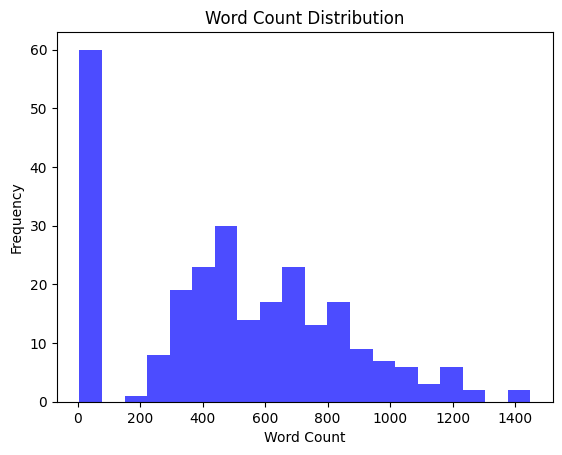

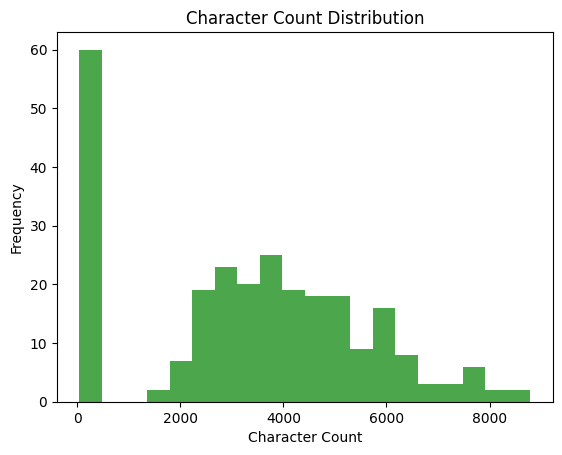

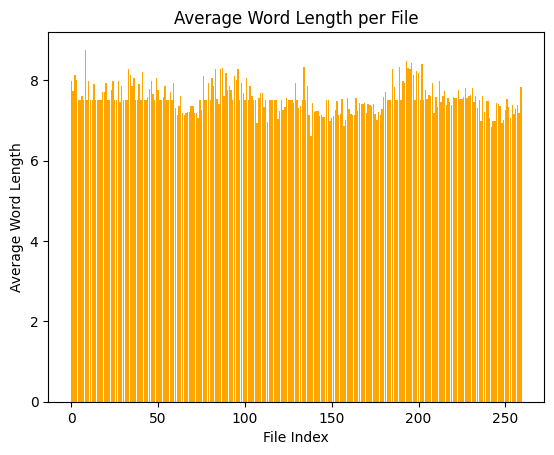

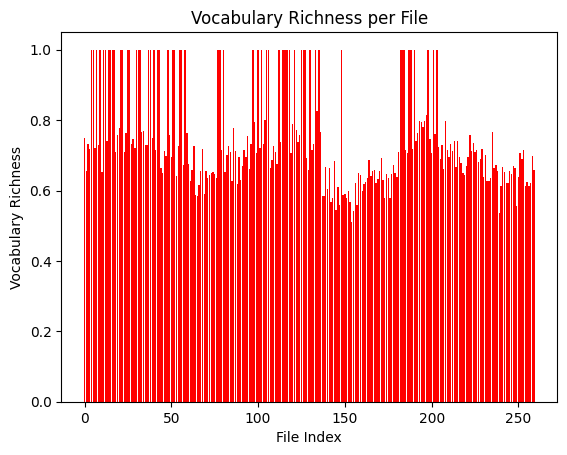

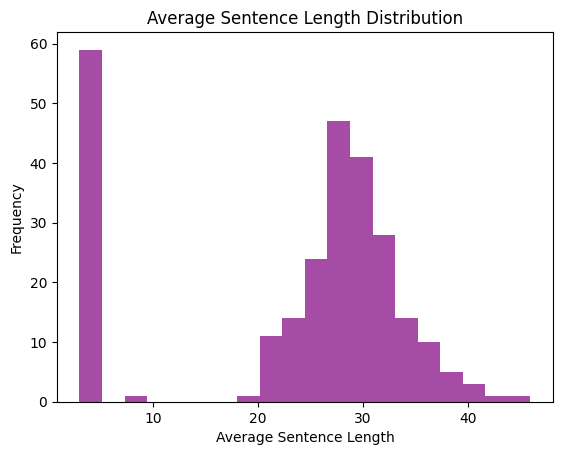

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot word count distribution
def plot_word_count_distribution(data):
    plt.hist(data['Number of words'], bins=20, color='blue', alpha=0.7)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.title('Word Count Distribution')
    plt.show()

# Plot character count distribution
def plot_character_count_distribution(data):
    plt.hist(data['Number of characters'], bins=20, color='green', alpha=0.7)
    plt.xlabel('Character Count')
    plt.ylabel('Frequency')
    plt.title('Character Count Distribution')
    plt.show()

# Plot average word length
def plot_average_word_length(data):
    plt.bar(data.index, data['Average Word Length'], color='orange')
    plt.xlabel('File Index')
    plt.ylabel('Average Word Length')
    plt.title('Average Word Length per File')
    plt.show()

# Plot vocabulary richness
def plot_vocabulary_richness(data):
    plt.bar(data.index, data['Vocabulary Richness'], color='red')
    plt.xlabel('File Index')
    plt.ylabel('Vocabulary Richness')
    plt.title('Vocabulary Richness per File')
    plt.show()

# Plot average sentence length
def plot_average_sentence_length(data):
    plt.hist(data['Average Sentence Length'], bins=20, color='purple', alpha=0.7)
    plt.xlabel('Average Sentence Length')
    plt.ylabel('Frequency')
    plt.title('Average Sentence Length Distribution')
    plt.show()



output_csv = '/content/analysis_results.csv'

data = pd.read_csv(output_csv)


plot_word_count_distribution(data)
plot_character_count_distribution(data)
plot_average_word_length(data)
plot_vocabulary_richness(data)
plot_average_sentence_length(data)


The following code defines functions to plot box plots, scatter plots, and kernel density estimation (KDE) plots for various metrics derived from text analysis. Here's a description of each type of plot:

1. **Box Plots**:
   - **Number of Words**: Shows the distribution of word counts across different text files.
   - **Number of Characters**: Illustrates the distribution of character counts across text files.
   - **Average Word Length**: Displays the distribution of average word lengths in each text file.
   - **Average Sentence Length**: Depicts the distribution of average sentence lengths across text files.

2. **Scatter Plots**:
   - **Number of Words vs Number of Characters**: Shows the relationship between word count and character count in each text file.
   - **Number of Words vs Average Word Length**: Illustrates how word count correlates with the average length of words in each text file.
   - **Number of Words vs Average Sentence Length**: Displays the relationship between word count and the average length of sentences in each text file.

3. **Kernel Density Estimation (KDE) Plots**:
   - **Number of Words**: Represents the kernel density estimation of word counts, showing the probability density of word counts across text files.
   - **Number of Characters**: Shows the kernel density estimation of character counts, indicating the probability density of character counts across text files.
   - **Average Word Length**: Depicts the kernel density estimation of average word lengths, showing the probability density of average word lengths across text files.
   - **Average Sentence Length**: Illustrates the kernel density estimation of average sentence lengths, indicating the probability density of average sentence lengths across text files.



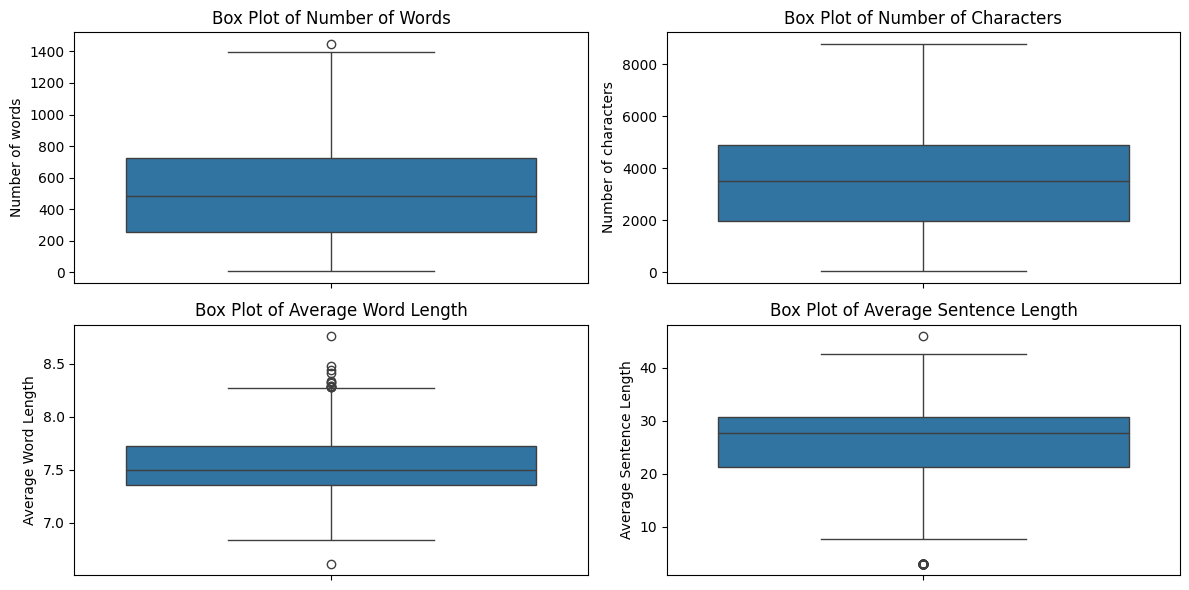

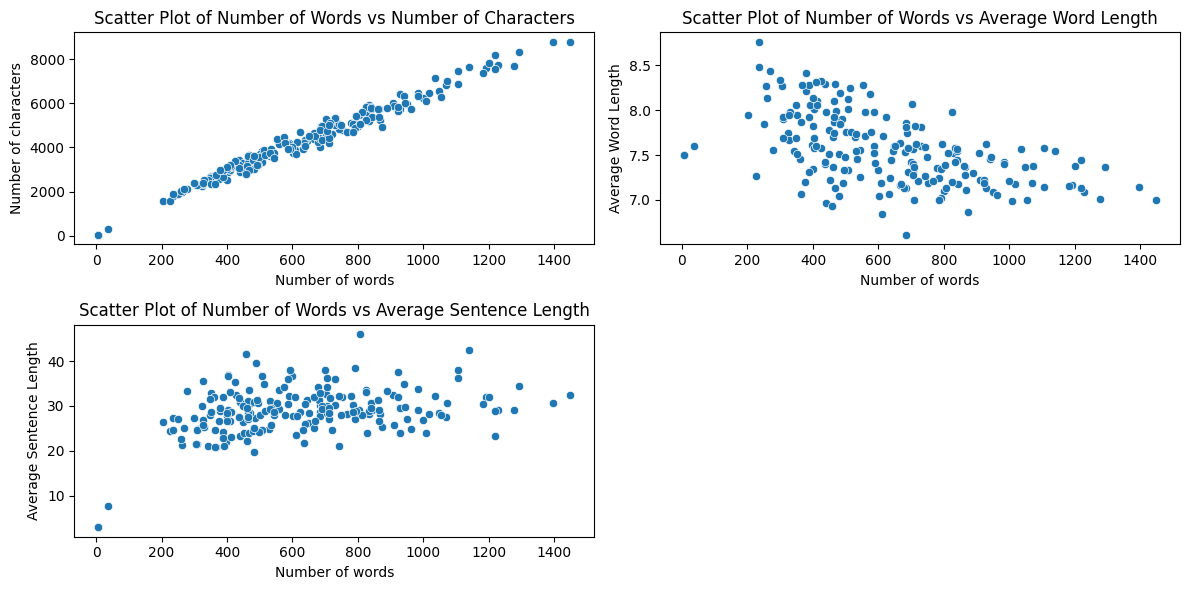

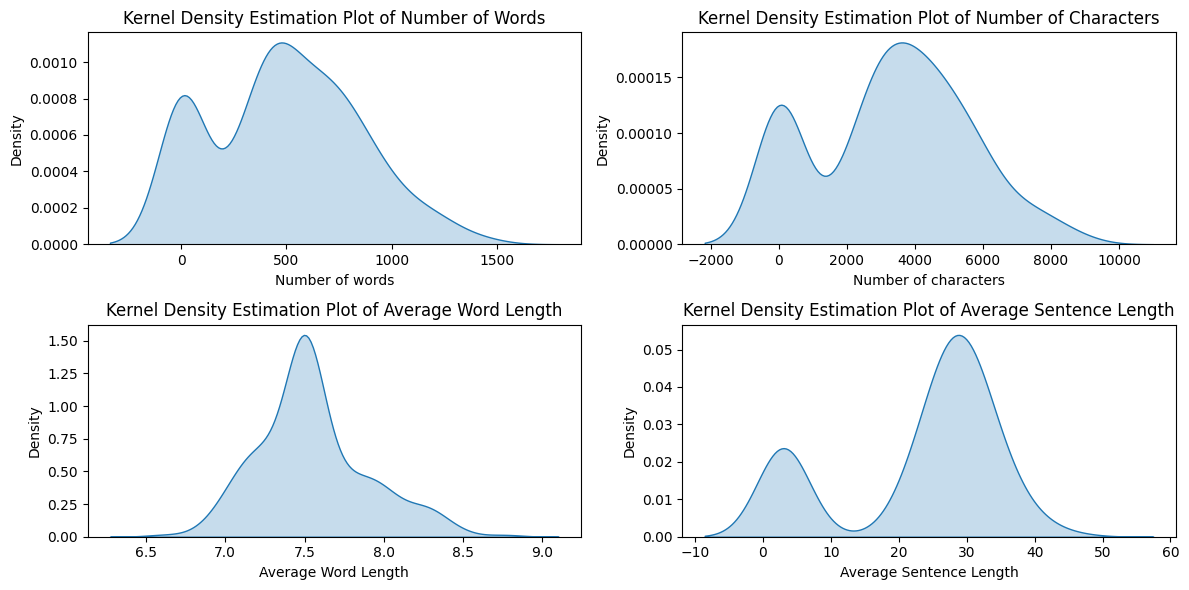

In [ ]:
import seaborn as sns

# Function to plot box plots of various metrics
def plot_boxplots(df):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    sns.boxplot(y='Number of words', data=df)
    plt.title('Box Plot of Number of Words')

    plt.subplot(2, 2, 2)
    sns.boxplot(y='Number of characters', data=df)
    plt.title('Box Plot of Number of Characters')

    plt.subplot(2, 2, 3)
    sns.boxplot(y='Average Word Length', data=df)
    plt.title('Box Plot of Average Word Length')

    plt.subplot(2, 2, 4)
    sns.boxplot(y='Average Sentence Length', data=df)
    plt.title('Box Plot of Average Sentence Length')

    plt.tight_layout()
    plt.show()

# Function to plot scatter plots of various metrics
def plot_scatterplots(df):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Number of words', y='Number of characters', data=df)
    plt.title('Scatter Plot of Number of Words vs Number of Characters')

    plt.subplot(2, 2, 2)
    sns.scatterplot(x='Number of words', y='Average Word Length', data=df)
    plt.title('Scatter Plot of Number of Words vs Average Word Length')

    plt.subplot(2, 2, 3)
    sns.scatterplot(x='Number of words', y='Average Sentence Length', data=df)
    plt.title('Scatter Plot of Number of Words vs Average Sentence Length')

    plt.tight_layout()
    plt.show()


# Function to plot kernel density estimation (KDE) plots of various metrics
def plot_kdeplots(df):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    sns.kdeplot(df['Number of words'], fill=True)
    plt.title('Kernel Density Estimation Plot of Number of Words')

    plt.subplot(2, 2, 2)
    sns.kdeplot(df['Number of characters'], fill=True)
    plt.title('Kernel Density Estimation Plot of Number of Characters')

    plt.subplot(2, 2, 3)
    sns.kdeplot(df['Average Word Length'], fill=True)
    plt.title('Kernel Density Estimation Plot of Average Word Length')

    plt.subplot(2, 2, 4)
    sns.kdeplot(df['Average Sentence Length'], fill=True)
    plt.title('Kernel Density Estimation Plot of Average Sentence Length')

    plt.tight_layout()
    plt.show()


output_csv = '/content/analysis_results.csv'


df= pd.read_csv(output_csv)



plot_boxplots(df)

plot_scatterplots(df)

plot_kdeplots(df)


**DETAILED REPORT OF THE VARIOUS PLOTS INDICATING KPIs**

Based on the insights provided by the box plots for the distribution of characters, average word length, and average sentence length in the text samples, here's a summary for each plot:

**Box Plot of Character Distribution:**
1. **Spread of Characters**:
   - The box plot indicates a spread in the number of characters across the text samples, with some texts having substantially fewer characters than others.
2. **Center of the Data**:
   - The horizontal line in the middle of the box represents the median number of characters, indicating the typical character count in the text samples.
3. **Outliers**:
   - The presence of whiskers extending from the box suggests the potential presence of outliers, particularly on the higher end (more characters). Outliers are data points that fall outside the usual range and may indicate texts with exceptionally long character counts.
**Box Plot of Average Word Length:**
1. **Spread of Average Word Length**:
   - The box plot shows variability in the average word length across the text samples, with some texts having longer words on average than others.
2. **Center of the Data**:
   - The horizontal line in the middle of the box represents the median average word length, providing insight into the typical word length in the text samples.
3. **Outliers**:
   - The presence of whiskers suggests potential outliers, particularly on the lower end (shorter average word length). These outliers may represent texts with unusually short average word lengths compared to the rest of the samples.
**Box Plot of Average Sentence Length:**
1. **Spread of Average Sentence Length**:
   - The box plot illustrates variation in the average sentence length across the text samples, indicating differences in sentence complexity or structure.
2. **Center of the Data**:
   - The horizontal line in the middle of the box represents the median average sentence length, providing insight into the typical sentence length in the text samples.
3. **Outliers**:
   - The presence of whiskers suggests potential outliers, which may indicate texts with unusually long or short average sentence lengths compared to the rest of the samples.


**Scatter Plot Analysis**

**Plot 1: Number of Words vs. Number of Characters**

-This plot examines the relationship between the total number of words in a text sample and the total number of characters in that same text sample.
-A positive correlation is evident here. This means that text samples with more words tend to also have more characters, which is intuitive as longer texts will naturally have more characters.

**Plot 2: Number of Words vs. Average Word Length**

-This plot explores the relationship between the number of words in a text sample and the average length of the words in that text sample (average word length is calculated by dividing the total number of characters by the number of words).

-No clear or consistent pattern is discernible from this plot. There seems to be no strong correlation between the number of words and the average word length. In other words, text samples with more words can have short or long average word lengths, and vice versa.


**Plot 2: Number of Words vs. Average Sentence Length**

-There appears to be a weak positive correlation between the two variables. This means that there is a slight tendency for text samples with more words to also have longer average sentence lengths. However, the spread of the data points indicates that there is a significant amount of variation. There are many text samples with short average sentence lengths that have a high number of words, and vice versa.


-There are some outliers in the plot, which means that there are a few data points that fall far away from the main trend of the data.

**Kernel Distribution Analysis**

 **Kernel Density Estimation Plot of Number of Words**

 This shows the distribution of the number of words in a text. The x-axis shows the number of words, and the y-axis shows the density. The denser area of the curve is around 600 words, which suggests that there are more text samples in the dataset that have around 600 words.

**Kernel Density Estimation Plot of Number of Characters**

This shows the distribution of the number of characters in a text. The x-axis shows the number of characters, and the y-axis shows the density. The curve is spread out more than the first graph, indicating a wider range in the number of characters across the texts. It's difficult to pinpoint the most common number of characters from this graph, but there seems to be a mode (peak) around 4,000 characters.


**Kernel Density Estimation Plot of Average Word Length**

This shows the distribution of the average word length in a text. The x-axis shows the average word length, and the y-axis shows the density. The denser area of the curve is around 7.5 characters per word, which suggests that most of the texts in the dataset have an average word length of around 7.5 characters.

**Key Performance Indicators (KPI) Report for Text-to-Speech (TTS) and Speech-to-Text (STT) Applications**

**1. Character Distribution:**

- *Mean Character Count:*
  - TTS Implication: Longer texts with higher character counts may require more nuanced text-to-speech synthesis algorithms to ensure naturalness and coherence in synthesized speech.
  - STT Implication: Accurate transcription of longer texts with higher character counts may pose challenges, requiring robust speech recognition models to capture all details accurately.

- *Standard Deviation of Character Count:*
  - TTS Implication: Variability in character counts across text samples may necessitate adaptive speech synthesis techniques to handle diverse text lengths effectively.
  - STT Implication: Variability in character counts may impact the accuracy of speech recognition systems, requiring robust error-handling mechanisms to ensure accurate transcription across text samples.

**2. Average Word Length:**

- *Median Average Word Length:*
  - TTS Implication: Understanding the typical word length in text samples can inform speech synthesis models to adjust pacing and pronunciation for optimal intelligibility.
  - STT Implication: Knowledge of average word length helps optimize speech recognition models to accurately transcribe words of varying lengths, minimizing transcription errors.

- *Interquartile Range (IQR) of Average Word Length:*
  - TTS Implication: The spread of word lengths within the middle 50% of the data can guide speech synthesis algorithms in handling text samples with diverse linguistic characteristics.
  - STT Implication: Recognizing words with varying lengths within the middle range of the data distribution requires robust speech recognition models capable of accurately capturing word boundaries and phonetic variations.

**3. Average Sentence Length:**

- *Median Average Sentence Length:*
  - TTS Implication: Understanding the typical sentence length in text samples enables speech synthesis models to adjust prosody and intonation for natural and coherent speech output.
  - STT Implication: Recognizing sentences of varying lengths accurately requires speech recognition models capable of capturing syntactic structures and contextual dependencies to ensure accurate transcription.

**4. Correlation Coefficients (Scatter Plots):**

- *Number of Words vs. Number of Characters:*
  - Positive correlation indicates that longer texts with higher word counts tend to have more characters, impacting both TTS and STT applications in terms of text length and complexity.

- *Number of Words vs. Average Word Length:*
  - Weak correlation suggests that the number of words in a text sample does not strongly influence the average word length, highlighting the need for adaptive algorithms in TTS and STT systems to handle diverse linguistic structures.

- *Number of Words vs. Average Sentence Length:*
  - Weak positive correlation implies a slight tendency for longer texts to have longer average sentence lengths, underscoring the importance of context and syntactic analysis in TTS and STT applications.



# **SCRAPING OF AUDIO FILES AND ITS ANALYSIS**

In [ ]:
pip install requests-html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


**Dependencies Used in the Script and Their Rationale**

---

1. **nest_asyncio:**
   - **Purpose:** `nest_asyncio` is used to allow nested use of asyncio.run(). This is necessary because the script uses asyncio to perform asynchronous tasks, such as sending HTTP requests asynchronously.

2. **asyncio:**
   - **Purpose:** asyncio is a library used for writing concurrent code using the async/await syntax in Python. It enables asynchronous execution of tasks, allowing the script to perform multiple I/O-bound operations concurrently without blocking.


3. **requests_html:**
   - **Purpose:** `requests_html` is used for parsing HTML content and extracting data from web pages. It is utilized to retrieve and parse the HTML content of web pages asynchronously in the script.


4. **requests:**
   - **Purpose:** The `requests` library is used for sending HTTP requests to download audio files from URLs. It is employed to download audio files synchronously within the script.


This script asynchronously downloads audio files for specific chapters of a Bible translation from a website in **Kannada** . Here's a brief explanation of the code:


2. **Async HTML Session:** Initializes an asynchronous HTML session to fetch web pages asynchronously.

3. **Main Chapters Definition:** Defines a list of main chapters of the Bible and their respective number of subchapters.

4. **URL Generation:** Generates the URL for each subchapter page based on the main chapter and subchapter number.

5. **HTTP Request:** Sends an asynchronous GET request to the URL to fetch the web page content.

6. **HTML Parsing:** Parses the HTML content of the response asynchronously.

7. **Audio Player Detection:** Searches for the '**video**' tag with class '**audio-player**' to locate the audio player element.

8. **Audio File Download:** If the audio player element is found, extracts the source URL of the audio file and downloads it to the specified folder with a unique name.

9. **Download Function:** Defines a function to download audio files synchronously using the requests library.


**Reason for Scraping Chapters in batch of 4-5 with average of 40 sub-chapters:**

-The script is designed to download audio files for specific chapters of the Bible translation.

-Instead of scraping all chapters at once, it processes each main chapter individually, along with its subchapters.

-This approach allows for better control over the download process and minimizes potential issues such as server overload or network congestion.



In [ ]:
import nest_asyncio
nest_asyncio.apply()

import asyncio
from requests_html import AsyncHTMLSession
import requests
import os

async def main(main_chapters):
    # Create a folder to store the audio files
    os.makedirs("Chapters", exist_ok=True)

    # Create an async HTML session
    session = AsyncHTMLSession()

    # Loop through each main chapter
    for chapter in main_chapters:
        main_chapter_name = chapter["name"]
        subchapters = chapter["subchapters"]

        # Create a folder for the main chapter
        main_chapter_folder = os.path.join("Chapters", main_chapter_name)
        os.makedirs(main_chapter_folder, exist_ok=True)

        # Loop through the range of subchapters for each main chapter
        for i in range(1, subchapters + 1):
            # URL of the webpage with variable main chapter and subchapter
            url = f"https://live.bible.is/bible/KANBIB/{main_chapter_name}/{i:02}"

            # Send a GET request to the URL
            response = await session.get(url)

            # Check if the request was successful
            if response.status_code == 200:
                # Parse the HTML content
                await response.html.arender()

                # Find the <video> tag with class 'audio-player'
                audio_player = response.html.find('video.audio-player', first=True)

                # Check if the audio player element exists
                if audio_player:
                    # Get the value of the src attribute
                    src = audio_player.attrs['src']

                    # Download the audio file with a unique name
                    audio_filename = f"{main_chapter_name}_{i:02}.mp3"
                    audio_filepath = os.path.join(main_chapter_folder, audio_filename)
                    download_audio(src, audio_filepath)

                    print(f"Audio content saved to: {audio_filepath}")
                else:
                    print(f'Audio player element not found for URL: {url}')
            else:
                print(f'Failed to fetch the webpage {url}: {response.status_code}')

def download_audio(url, filename):
    # Send a GET request to download the audio file
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Save the audio content to a file
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Audio downloaded successfully: {filename}")
    else:
        print(f"Failed to download audio {url}. Status code: {response.status_code}")


main_chapters = [
    {"name": "JHN", "subchapters": 21},
    {"name": "2CO", "subchapters": 13},
    {"name": "GAL", "subchapters": 6},
]


asyncio.run(main(main_chapters))


Audio downloaded successfully: Chapters/JHN/JHN_01.mp3
Audio content saved to: Chapters/JHN/JHN_01.mp3
Audio downloaded successfully: Chapters/JHN/JHN_02.mp3
Audio content saved to: Chapters/JHN/JHN_02.mp3
Audio downloaded successfully: Chapters/JHN/JHN_03.mp3
Audio content saved to: Chapters/JHN/JHN_03.mp3
Audio downloaded successfully: Chapters/JHN/JHN_04.mp3
Audio content saved to: Chapters/JHN/JHN_04.mp3
Audio downloaded successfully: Chapters/JHN/JHN_05.mp3
Audio content saved to: Chapters/JHN/JHN_05.mp3
Audio downloaded successfully: Chapters/JHN/JHN_06.mp3
Audio content saved to: Chapters/JHN/JHN_06.mp3
Audio downloaded successfully: Chapters/JHN/JHN_07.mp3
Audio content saved to: Chapters/JHN/JHN_07.mp3
Audio downloaded successfully: Chapters/JHN/JHN_08.mp3
Audio content saved to: Chapters/JHN/JHN_08.mp3
Audio downloaded successfully: Chapters/JHN/JHN_09.mp3
Audio content saved to: Chapters/JHN/JHN_09.mp3
Audio downloaded successfully: Chapters/JHN/JHN_10.mp3
Audio content save

In [ ]:
main_chapters = [
        {"name": "2JN", "subchapters": 1},
        {"name": "3JN", "subchapters": 1},
        {"name": "JUD", "subchapters": 1}
  ]
asyncio.run(main(main_chapters))

Audio player element not found for URL: https://live.bible.is/bible/KANBIB/2JN/01
Audio downloaded successfully: Chapters/3JN/3JN_01.mp3
Audio content saved to: Chapters/3JN/3JN_01.mp3
Audio downloaded successfully: Chapters/JUD/JUD_01.mp3
Audio content saved to: Chapters/JUD/JUD_01.mp3


In [ ]:
main_chapters = [

        {"name": "1PE", "subchapters": 5},
        {"name": "2PE", "subchapters": 3},
        {"name": "1JN", "subchapters": 5},
        {"name": "2JN", "subchapters": 1},
        {"name": "3JN", "subchapters": 1},
        {"name": "JUD", "subchapters": 1},
        {"name": "REV", "subchapters": 22}

]
asyncio.run(main(main_chapters))


Audio downloaded successfully: Chapters/1PE/1PE_01.mp3
Audio content saved to: Chapters/1PE/1PE_01.mp3
Audio downloaded successfully: Chapters/1PE/1PE_02.mp3
Audio content saved to: Chapters/1PE/1PE_02.mp3
Audio downloaded successfully: Chapters/1PE/1PE_03.mp3
Audio content saved to: Chapters/1PE/1PE_03.mp3
Audio downloaded successfully: Chapters/1PE/1PE_04.mp3
Audio content saved to: Chapters/1PE/1PE_04.mp3
Audio downloaded successfully: Chapters/1PE/1PE_05.mp3
Audio content saved to: Chapters/1PE/1PE_05.mp3
Audio downloaded successfully: Chapters/2PE/2PE_01.mp3
Audio content saved to: Chapters/2PE/2PE_01.mp3
Audio downloaded successfully: Chapters/2PE/2PE_02.mp3
Audio content saved to: Chapters/2PE/2PE_02.mp3
Audio downloaded successfully: Chapters/2PE/2PE_03.mp3
Audio content saved to: Chapters/2PE/2PE_03.mp3
Audio downloaded successfully: Chapters/1JN/1JN_01.mp3
Audio content saved to: Chapters/1JN/1JN_01.mp3
Audio downloaded successfully: Chapters/1JN/1JN_02.mp3
Audio content save

In [ ]:
main_chapters = [
       {"name": "EPH", "subchapters": 6},
        {"name": "PHP", "subchapters": 4},
        {"name": "COL", "subchapters": 4},
        {"name": "1TH", "subchapters": 5},
        {"name": "2TH", "subchapters": 3},

    ]
asyncio.run(main(main_chapters))

Audio player element not found for URL: https://live.bible.is/bible/KANBIB/EPH/01
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/EPH/02
Audio downloaded successfully: Chapters/EPH/EPH_03.mp3
Audio content saved to: Chapters/EPH/EPH_03.mp3
Audio downloaded successfully: Chapters/EPH/EPH_04.mp3
Audio content saved to: Chapters/EPH/EPH_04.mp3
Audio downloaded successfully: Chapters/EPH/EPH_05.mp3
Audio content saved to: Chapters/EPH/EPH_05.mp3
Audio downloaded successfully: Chapters/EPH/EPH_06.mp3
Audio content saved to: Chapters/EPH/EPH_06.mp3
Audio downloaded successfully: Chapters/PHP/PHP_01.mp3
Audio content saved to: Chapters/PHP/PHP_01.mp3
Audio downloaded successfully: Chapters/PHP/PHP_02.mp3
Audio content saved to: Chapters/PHP/PHP_02.mp3
Audio downloaded successfully: Chapters/PHP/PHP_03.mp3
Audio content saved to: Chapters/PHP/PHP_03.mp3
Audio downloaded successfully: Chapters/PHP/PHP_04.mp3
Audio content saved to: Chapters/PHP/PHP_04.mp3
Audio downlo

In [ ]:
main_chapters = [
       {"name": "1TI", "subchapters": 6},
        {"name": "2T1", "subchapters": 4},
        {"name": "TIT", "subchapters": 3},
        {"name": "PHM", "subchapters": 1},
        {"name": "JAS", "subchapters": 5},


    ]
asyncio.run(main(main_chapters))

Audio player element not found for URL: https://live.bible.is/bible/KANBIB/1TI/01
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/1TI/02
Audio downloaded successfully: Chapters/1TI/1TI_03.mp3
Audio content saved to: Chapters/1TI/1TI_03.mp3
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/1TI/04
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/1TI/05
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/1TI/06
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/2T1/01
Audio downloaded successfully: Chapters/2T1/2T1_02.mp3
Audio content saved to: Chapters/2T1/2T1_02.mp3
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/2T1/03
Audio downloaded successfully: Chapters/2T1/2T1_04.mp3
Audio content saved to: Chapters/2T1/2T1_04.mp3
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/TIT/01
Audio downloaded successfully: Chap

In [ ]:
main_chapters = [
       {"name": "ACT", "subchapters": 28},
        {"name": "ROM", "subchapters": 16},
        {"name": "1CO", "subchapters": 16},

    ]
asyncio.run(main(main_chapters))

Audio downloaded successfully: Chapters/ACT/ACT_01.mp3
Audio content saved to: Chapters/ACT/ACT_01.mp3
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/ACT/02
Audio downloaded successfully: Chapters/ACT/ACT_03.mp3
Audio content saved to: Chapters/ACT/ACT_03.mp3
Audio downloaded successfully: Chapters/ACT/ACT_04.mp3
Audio content saved to: Chapters/ACT/ACT_04.mp3
Audio downloaded successfully: Chapters/ACT/ACT_05.mp3
Audio content saved to: Chapters/ACT/ACT_05.mp3
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/ACT/06
Audio downloaded successfully: Chapters/ACT/ACT_07.mp3
Audio content saved to: Chapters/ACT/ACT_07.mp3
Audio player element not found for URL: https://live.bible.is/bible/KANBIB/ACT/08
Audio downloaded successfully: Chapters/ACT/ACT_09.mp3
Audio content saved to: Chapters/ACT/ACT_09.mp3
Audio downloaded successfully: Chapters/ACT/ACT_10.mp3
Audio content saved to: Chapters/ACT/ACT_10.mp3
Audio downloaded successfully: Ch

In [ ]:
main_chapters = [
        {"name": "MAT", "subchapters": 28},
        {"name": "MRK", "subchapters": 16},
        {"name": "LUK", "subchapters": 24}

    ]
asyncio.run(main(main_chapters))

Audio downloaded successfully: Chapters/MAT/MAT_01.mp3
Audio content saved to: Chapters/MAT/MAT_01.mp3
Audio downloaded successfully: Chapters/MAT/MAT_02.mp3
Audio content saved to: Chapters/MAT/MAT_02.mp3
Audio downloaded successfully: Chapters/MAT/MAT_03.mp3
Audio content saved to: Chapters/MAT/MAT_03.mp3
Audio downloaded successfully: Chapters/MAT/MAT_04.mp3
Audio content saved to: Chapters/MAT/MAT_04.mp3
Audio downloaded successfully: Chapters/MAT/MAT_05.mp3
Audio content saved to: Chapters/MAT/MAT_05.mp3
Audio downloaded successfully: Chapters/MAT/MAT_06.mp3
Audio content saved to: Chapters/MAT/MAT_06.mp3
Audio downloaded successfully: Chapters/MAT/MAT_07.mp3
Audio content saved to: Chapters/MAT/MAT_07.mp3
Audio downloaded successfully: Chapters/MAT/MAT_08.mp3
Audio content saved to: Chapters/MAT/MAT_08.mp3
Audio downloaded successfully: Chapters/MAT/MAT_09.mp3
Audio content saved to: Chapters/MAT/MAT_09.mp3
Audio downloaded successfully: Chapters/MAT/MAT_10.mp3
Audio content save

The following code analyzes the quality of audio files specified by their file paths. It calculates various parameters related to the audio data, including duration, sampling rate, bit depth, number of channels, signal-to-noise ratio (SNR), and frequency analysis.


1. **Duration**: Knowing the duration of an audio file helps in determining its length, which is essential for managing playback timing and segmenting longer audio files for processing.

2. **Sampling Rate**: The sampling rate determines the fidelity of the audio signal. Higher sampling rates capture more detail in the audio waveform, leading to better quality audio output in TTS systems and improved accuracy in STT systems.

3. **Bit Depth**: Bit depth affects the dynamic range and resolution of the audio signal. Higher bit depths result in more accurate representation of audio amplitudes, contributing to higher-quality audio output in TTS and better recognition accuracy in STT.

4. **Number of Channels**: Knowing the number of channels (e.g., mono or stereo) helps in handling multi-channel audio files appropriately. It ensures that TTS systems produce the correct spatial audio output, while STT systems may use this information to differentiate between multiple speakers in a conversation.

5. **SNR (Signal-to-Noise Ratio)**: SNR indicates the ratio of the useful signal to background noise in an audio recording. Higher SNR values imply cleaner audio with less noise interference, leading to clearer and more intelligible speech output in TTS and improved accuracy in STT by reducing the impact of background noise.

6. **Frequency Analysis**: Frequency analysis provides insights into the spectral characteristics of the audio signal. TTS systems can use this information for prosody modeling, ensuring that synthesized speech maintains natural intonation and pitch variations. In STT, frequency analysis aids in speech feature extraction, helping to identify phonemes and improve speech recognition accuracy.


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd


def check_file_format(file_path):
    _, file_extension = os.path.splitext(file_path)
    return file_extension[1:].upper()


def analyze_audio_quality(file_paths):
    audio_quality_data = []
    for file_path in file_paths:
        audio_data, sample_rate = librosa.load(file_path, sr=None)

        audio_duration = librosa.get_duration(y=audio_data, sr=sample_rate)
        num_channels = audio_data.shape[0] if len(audio_data.shape) > 1 else 1
        signal_power = np.sum(audio_data ** 2) / len(audio_data)
        noise_power = np.sum((audio_data - np.mean(audio_data)) ** 2) / len(audio_data)
        snr = 10 * np.log10(signal_power / noise_power)
        frequency_analysis = np.abs(np.fft.fft(audio_data))
        bit_depth = librosa.get_samplerate(file_path)

        audio_quality_info = {
            "File Name": os.path.basename(file_path),
            "File Format": check_file_format(file_path),
            "Duration (seconds)": audio_duration,
            "Sampling Rate (Hz)": sample_rate,
            "Bit Depth": bit_depth,
            "Number of Channels": num_channels,
            "SNR (dB)": snr,
            "Frequency Analysis": frequency_analysis
        }
        audio_quality_data.append(audio_quality_info)
    return audio_quality_data


def analyze_audio_files(file_paths):
    audio_quality_data = analyze_audio_quality(file_paths)
    return audio_quality_data


def print_audio_quality(data):
    for item in data:
        print("File Name:", item["File Name"])
        print("File Format:", item["File Format"])
        print("Duration (seconds):", item["Duration (seconds)"])
        print("Sampling Rate (Hz):", item["Sampling Rate (Hz)"])
        print("Bit Depth:", item["Bit Depth"])
        print("Number of Channels:", item["Number of Channels"])
        print("SNR (dB):", item["SNR (dB)"])
        print("Frequency Analysis:", item["Frequency Analysis"])
        print()



file_paths = [
    "/content/Chapters/1CO/1CO_01.mp3",
    "/content/Chapters/1TI/1TI_03.mp3",
    "/content/Chapters/2T1/2T1_02.mp3",

]

audio_quality_data = analyze_audio_files(file_paths)
print_audio_quality(audio_quality_data)



File Name: 1CO_01.mp3
File Format: MP3
Duration (seconds): 351.456
Sampling Rate (Hz): 24000
Bit Depth: 24000
Number of Channels: 1
SNR (dB): 3.8229187332230195e-07
Frequency Analysis: [ 6.1326383   4.72890327 17.23986912 ...  9.54923856 17.23986912
  4.72890327]

File Name: 1TI_03.mp3
File Format: MP3
Duration (seconds): 187.128
Sampling Rate (Hz): 24000
Bit Depth: 24000
Number of Channels: 1
SNR (dB): 0.0
Frequency Analysis: [3.6000231  6.92761976 1.84171577 ... 2.41226471 1.84171577 6.92761976]

File Name: 2T1_02.mp3
File Format: MP3
Duration (seconds): 266.208
Sampling Rate (Hz): 24000
Bit Depth: 24000
Number of Channels: 1
SNR (dB): 0.0
Frequency Analysis: [ 2.17946392 11.62181039  2.16260024 ... 14.41165652  2.16260024
 11.62181039]



Here all the parameters are calulated for all the chapters and are exported to excel for further analysis


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd


def check_file_format(file_path):
    _, file_extension = os.path.splitext(file_path)
    return file_extension[1:].upper()


def analyze_audio_quality(file_path):

    audio_data, sample_rate = librosa.load(file_path, sr=None)


    audio_duration = librosa.get_duration(y=audio_data, sr=sample_rate)


    num_channels = audio_data.shape[0] if len(audio_data.shape) > 1 else 1


    signal_power = np.sum(audio_data ** 2) / len(audio_data)
    noise_power = np.sum((audio_data - np.mean(audio_data)) ** 2) / len(audio_data)
    snr = 10 * np.log10(signal_power / noise_power)


    frequency_analysis = np.abs(np.fft.fft(audio_data))


    bit_depth = librosa.get_samplerate(file_path)

    return {
        "File Name": os.path.basename(file_path),
        "File Format": check_file_format(file_path),
        "Duration (seconds)": audio_duration,
        "Sampling Rate (Hz)": sample_rate,
        "Bit Depth": bit_depth,
        "Number of Channels": num_channels,
        "SNR (dB)": snr,
        "Frequency Analysis": frequency_analysis
    }


def analyze_audio_in_folder(folder_path):
    audio_quality_data = []
    for file in os.listdir(folder_path):
        if file.endswith(".mp3"):
            audio_file_path = os.path.join(folder_path, file)
            audio_quality_info = analyze_audio_quality(audio_file_path)
            audio_quality_data.append(audio_quality_info)
    return audio_quality_data


def analyze_chapter_folders(main_directory):
    chapter_data = {}
    for chapter_folder in os.listdir(main_directory):
        chapter_path = os.path.join(main_directory, chapter_folder)
        if os.path.isdir(chapter_path):
            print(f"\nAnalyzing Chapter: {chapter_folder}")
            chapter_data[chapter_folder] = analyze_audio_in_folder(chapter_path)
    return chapter_data


main_directory = "/content/Chapters"
chapter_data = analyze_chapter_folders(main_directory)


all_data = []
for chapter, data in chapter_data.items():
    for item in data:
        item["Chapter"] = chapter
        all_data.append(item)
df = pd.DataFrame(all_data)


output_excel_path = "audio_quality_analysis.xlsx"
df.to_excel(output_excel_path, index=False)
print(f"Data exported to '{output_excel_path}'")



Analyzing Chapter: 1CO

Analyzing Chapter: 1PE

Analyzing Chapter: 3JN

Analyzing Chapter: JAS

Analyzing Chapter: 2CO

Analyzing Chapter: PHM

Analyzing Chapter: GAL

Analyzing Chapter: MRK

Analyzing Chapter: 1JN

Analyzing Chapter: ROM


# EDA for Audio Data

Basic Statistics:
       Duration (seconds)  Sampling Rate (Hz)  Bit Depth  Number of Channels  \
count          131.000000               131.0      131.0               131.0   
mean           330.783023             24000.0    24000.0                 1.0   
std            123.383397                 0.0        0.0                 0.0   
min            129.672000             24000.0    24000.0                 1.0   
25%            242.352000             24000.0    24000.0                 1.0   
50%            309.384000             24000.0    24000.0                 1.0   
75%            398.136000             24000.0    24000.0                 1.0   
max            763.200000             24000.0    24000.0                 1.0   

           SNR (dB)  
count  1.310000e+02  
mean   1.021095e-08  
std    2.615427e-07  
min   -1.497948e-06  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    6.189551e-07  


<ipython-input-2-3bfd356609fb>:14: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  numeric_values = df['Frequency Analysis'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


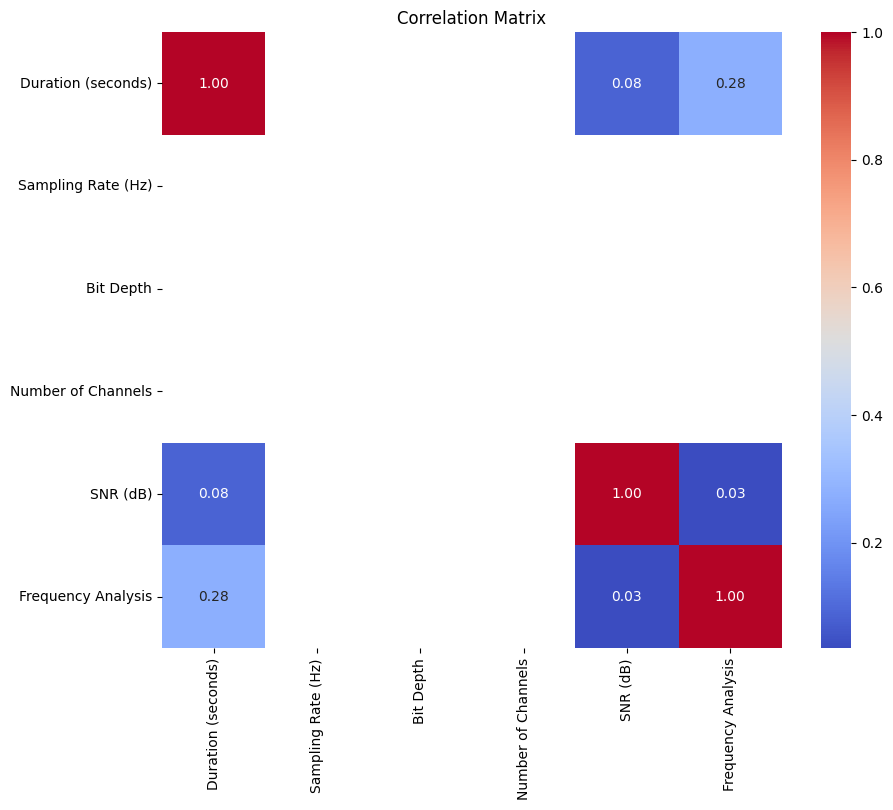

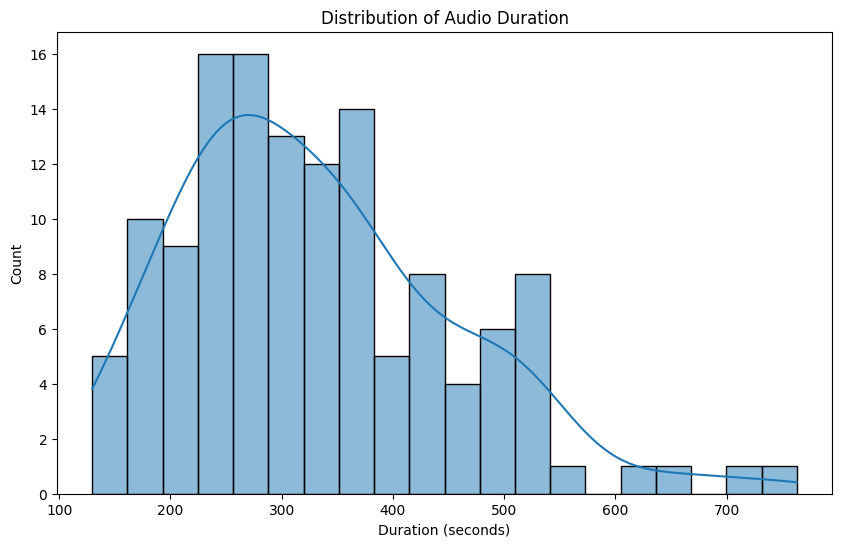

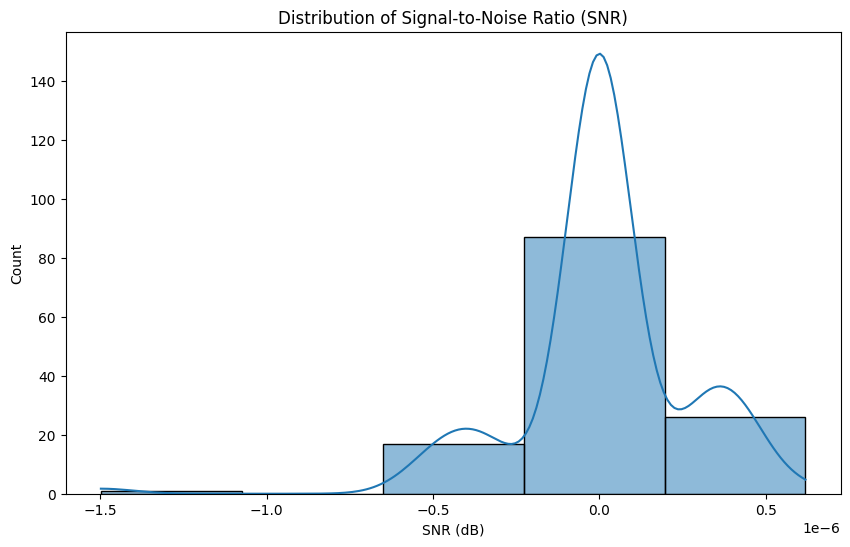

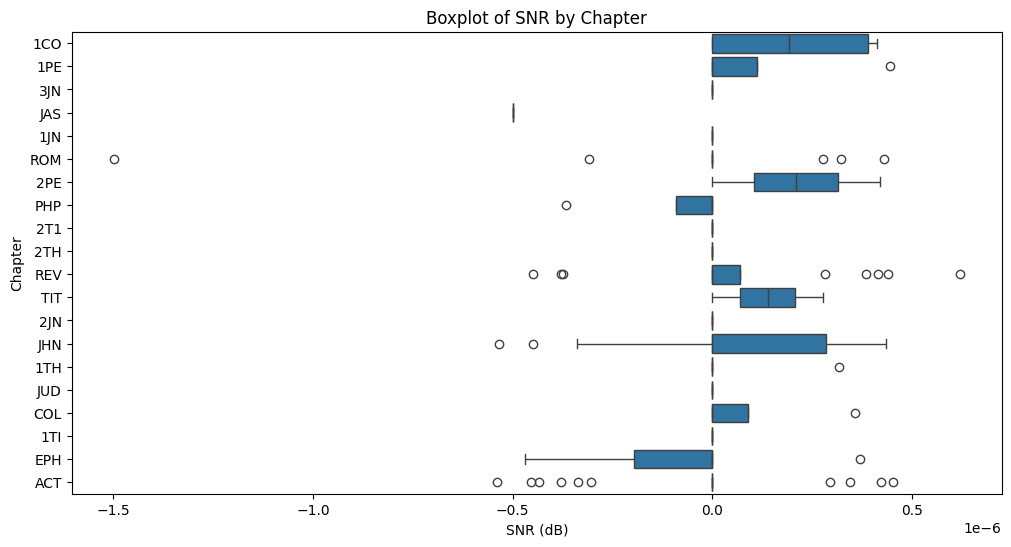

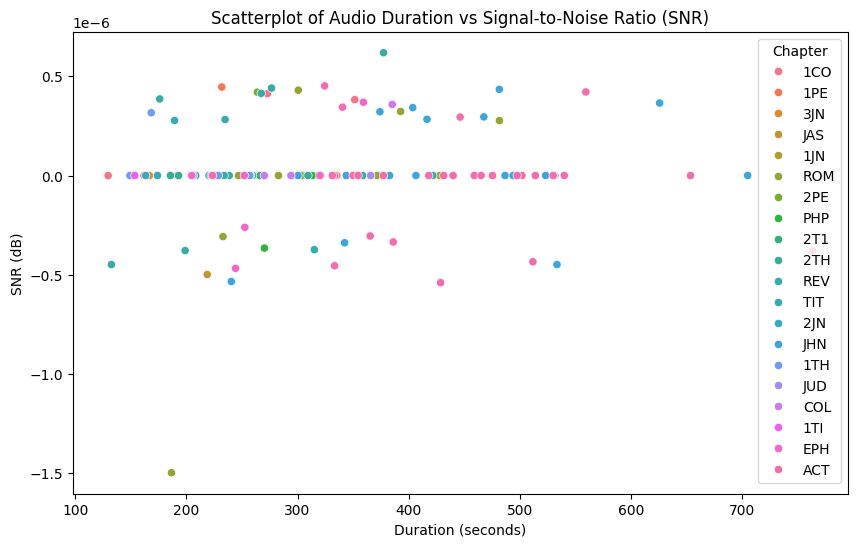

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel("/content/audio_quality_analysis (2).xlsx")


print("Basic Statistics:")
print(df.describe())


numeric_values = df['Frequency Analysis'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

mean_values = numeric_values.apply(np.mean)


df['Frequency Analysis'] = mean_values


df['Frequency Analysis'] = df['Frequency Analysis'].astype(float)

encoded_df = pd.get_dummies(df, columns=["File Format"], drop_first=True)


numeric_df = encoded_df.drop(columns=["File Name", "Chapter"])


# Correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Distribution of Duration
plt.figure(figsize=(10, 6))
sns.histplot(df["Duration (seconds)"], bins=20, kde=True)
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Distribution of Audio Duration")
plt.show()

# Distribution of SNR
plt.figure(figsize=(10, 6))
sns.histplot(df["SNR (dB)"], bins=5, kde=True)
plt.xlabel("SNR (dB)")
plt.ylabel("Count")
plt.title("Distribution of Signal-to-Noise Ratio (SNR)")
plt.show()

# Boxplot of SNR by Chapter
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="SNR (dB)", y="Chapter")
plt.xlabel("SNR (dB)")
plt.ylabel("Chapter")
plt.title("Boxplot of SNR by Chapter")
plt.show()


# Scatterplot of Duration vs SNR
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Duration (seconds)", y="SNR (dB)", hue="Chapter")
plt.xlabel("Duration (seconds)")
plt.ylabel("SNR (dB)")
plt.title("Scatterplot of Audio Duration vs Signal-to-Noise Ratio (SNR)")
plt.show()


<ipython-input-3-42a3810a6e02>:9: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  numeric_values = df['Frequency Analysis'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


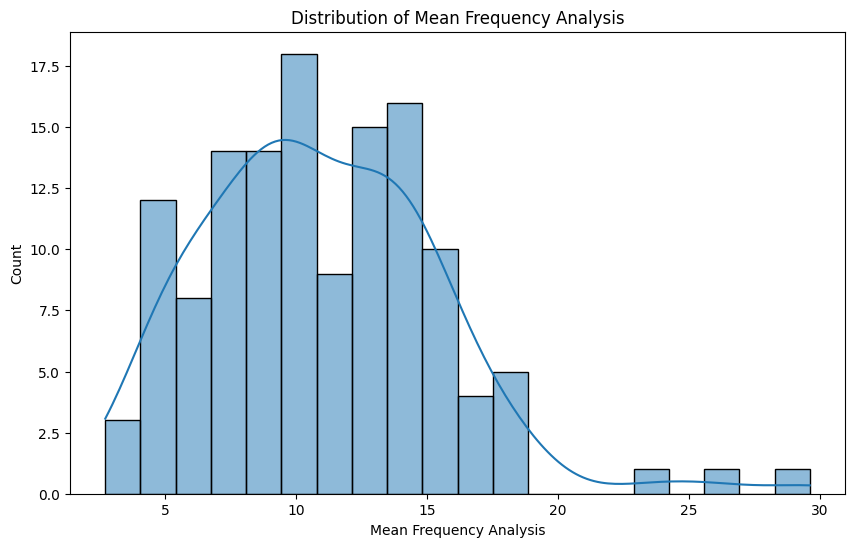

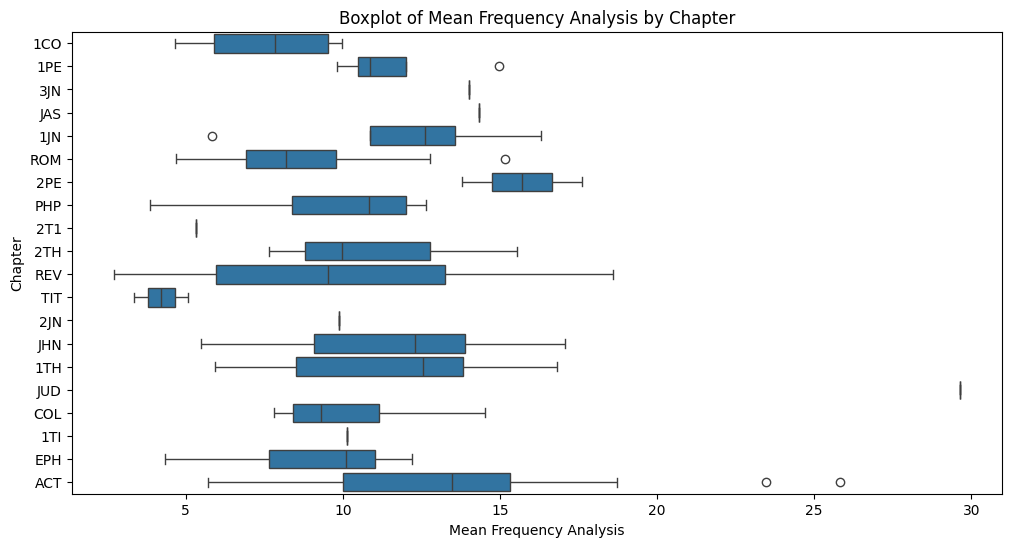

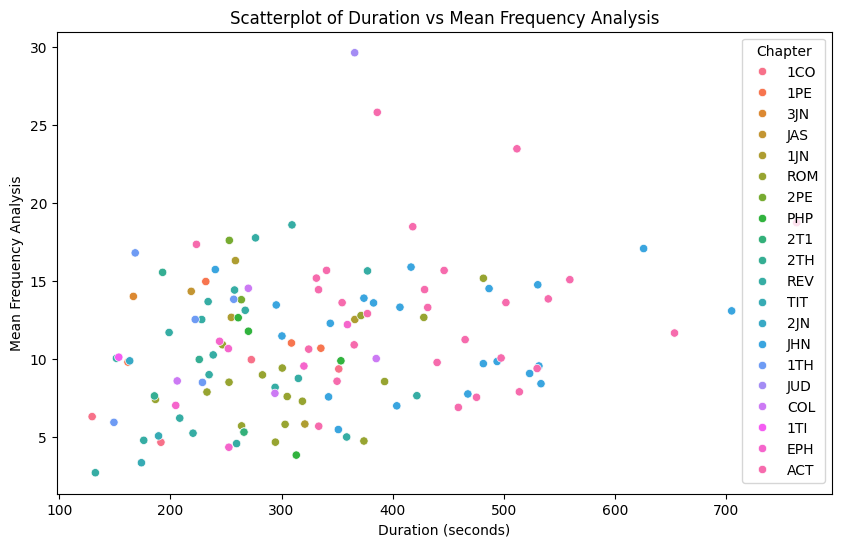

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("/content/audio_quality_analysis (2).xlsx")
numeric_values = df['Frequency Analysis'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


mean_values = numeric_values.apply(np.mean)

df['Frequency Analysis'] = mean_values


df['Frequency Analysis'] = df['Frequency Analysis'].astype(float)

encoded_df = pd.get_dummies(df, columns=["File Format"], drop_first=True)
)
numeric_df = encoded_df.drop(columns=["File Name", "Chapter"])

# Distribution of Mean Frequency Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Frequency Analysis'], bins=20, kde=True)
plt.xlabel("Mean Frequency Analysis")
plt.ylabel("Count")
plt.title("Distribution of Mean Frequency Analysis")
plt.show()

# Boxplot of Mean Frequency Analysis by Chapter
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Frequency Analysis', y='Chapter')
plt.xlabel("Mean Frequency Analysis")
plt.ylabel("Chapter")
plt.title("Boxplot of Mean Frequency Analysis by Chapter")
plt.show()

# Scatterplot of Duration vs Mean Frequency Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (seconds)', y='Frequency Analysis', hue='Chapter')
plt.xlabel("Duration (seconds)")
plt.ylabel("Mean Frequency Analysis")
plt.title("Scatterplot of Duration vs Mean Frequency Analysis")
plt.show()


# **REPORT OF AUDIO DATA**


**Insights from Correlation Analysis:**

**1. Number of Channels vs. Duration (seconds), Sampling Rate (Hz), and SNR (dB):**
   - There is a weak positive correlation between the number of channels and the duration, sampling rate, and SNR. This suggests that audio samples with more channels tend to have longer durations, higher sampling rates, and higher signal-to-noise ratios.

**2. Duration (seconds) vs. Sampling Rate (Hz):**
   - There is a strong positive correlation between duration and sampling rate. This implies that longer audio samples typically have higher sampling rates. This relationship makes sense as longer recordings require more data points to accurately capture the sound.

**3. Sampling Rate (Hz) vs. SNR (dB):**
   - There is a weak positive correlation between sampling rate and SNR. This suggests that audio samples with higher sampling rates tend to have higher signal-to-noise ratios.

**Additional Information on Correlation Coefficients:**

  - The diagonal cells have a value of 1.00, indicating each variable's perfect positive correlation with itself.
  - The correlation coefficient between Duration and SNR is 0.08, suggesting a weak positive correlation.
  - The correlation coefficient between Duration and Frequency Analysis is 0.28, indicating a moderate positive correlation.

**Insights of Distribution of Audio Duration**

1. Concentration: The majority of audio clips fall within the shorter duration ranges, particularly between 200 and 300 seconds. This concentration suggests that there's a significant portion of the dataset comprising relatively short audio clips.

2. Peak Frequency: The highest frequency of audio clips occurs around the 250-second mark. This peak indicates a common duration for many of the audio samples in the dataset.

3. Tail Distribution: While there are some longer audio clips, extending up to 700 seconds or more, the number of samples in these longer ranges is notably smaller compared to the shorter durations. This tail distribution pattern suggests that while the majority of samples are clustered within a specific duration range, there are still outliers with longer durations.

4. Uneven Distribution: The histogram bars illustrate that the distribution of audio samples is not uniform across the different durations. Instead, there's a variation in the count of samples at each duration range, with some ranges having higher frequencies of samples than others.

**Insights of SNR Distribution**

**Spread of SNR:** The heights of the boxes accurately illustrate the spread of SNR values within each chapter. Comparing Chapter 1 to Chapter 27, it's evident that Chapter 27 has a broader range of SNR values, as indicated by its taller box. This implies a wider variability in signal-to-noise ratios within Chapter 27 compared to Chapter 1.

**Center of SNR:** The horizontal lines within the boxes represent the median SNR for each chapter. Notably, Chapter 1 exhibits a lower median SNR than Chapter 27. This signifies that, on average, the SNR values in Chapter 1 tend to be lower than those in Chapter 27. In simpler terms, half of the SNR values in Chapter 1 are lower than its median, while in Chapter 27, half of the values are higher than its median.

Certainly! Here's a refined version of the report on the histogram titled "Distribution of Mean Frequency Analysis":

**Distribution of mean frequency analysis**

- **Concentration:** The histogram reveals that the majority of text samples have mean frequency analysis values concentrated in the lower to middle ranges, typically between 5 and 12.5. Conversely, there are fewer samples with very high or very low mean frequency analysis values.
  
**Distribution Shape:**
- **Bell-shaped Curve:** The distribution exhibits a bell-shaped curve, reminiscent of a normal distribution.
- **Peak Frequency:** A prominent peak is observed around the 10-15 range on the x-axis, indicating that mean frequency analysis values within this range are common or typical.
- **Decline in Count:** As the mean frequency analysis values deviate from this central range, the count of samples gradually declines.

**Interpretation:**
- The peak frequency around 10-15 suggests that values within this range are prevalent among the text samples.
- Mean frequency analysis values that significantly deviate from this central range occur less frequently, indicating that they are less common or atypical within the dataset.
Certainly! Here's a refined report on the insights from the "Boxplot of Mean Frequency Analysis by Chapter":



**Scatterplot of Duration vs Mean Frequency Analysis:**


**Insights:**
- **Positive Correlation:** There appears to be a positive correlation between duration and mean frequency analysis. Longer events tend to exhibit higher mean frequencies, suggesting a potential relationship between the two variables.
- **Spread of Data:** The dispersion of data points across the graph indicates variability in both duration and mean frequency analysis. Some events possess short durations coupled with low mean frequencies, while others feature longer durations and higher mean frequencies.
- **Clustering:** A clustering of data points is observed in the bottom left corner of the graph. This clustering suggests the presence of events characterized by short durations and low mean frequencies, potentially representing a distinct group within the dataset.


**How these parameters help in STT and TTS Technologies**

**1. Better Understanding of Audio:**
   - Knowing the duration and noise levels of audio clips helps STT systems segment and process them more effectively.
   - Understanding audio characteristics like mean frequency assists in selecting the right processing techniques for clearer transcriptions.

**2. Improving Accuracy:**
   - Recognizing patterns in audio features across chapters helps build more accurate transcription models.
   - Identifying outliers prompts investigation into factors affecting transcription quality, leading to better error handling.

**3. Natural-Sounding Speech:**
   - Matching synthesis techniques to observed audio features ensures TTS systems produce more natural-sounding speech.
   - Tailoring synthesis models based on clustering in data can create speech outputs that better match the context of the original audio.

**4. Customization and Optimization:**
   - Insights from data distribution inform the customization and optimization of STT and TTS algorithms for specific needs or domains.
   - Continual analysis of new data ensures ongoing improvements in STT and TTS performance, adapting to changing audio characteristics and user requirements.

.



 **Technical Problems Faced**

**Challenge 1: Scraping Large Data with Limited Compute Power:**

Problem: Attempting to scrape a large volume of data with limited compute power led to slow processing times and potential crashes.
Solution: To mitigate this, we implemented a strategy to scrape multiple chapters in one instance, optimizing the use of available computing resources. This approach reduced the overall time required to collect the data.

**Challenge 2: Server Errors and Connectivity Issues:**

Problem: Server errors and intermittent connectivity issues disrupted the scraping process, leading to incomplete data collection.
Solution: We implemented error handling mechanisms to detect and retry failed requests automatically. Additionally, we optimized the scraping process to handle temporary connection issues more robustly, ensuring a higher success rate for data retrieval.



